In [78]:
import numpy as np
import pandas as pd
# Warnings
import warnings
warnings.filterwarnings('ignore')

import math
from sklearn.externals import joblib 


In [170]:
# Multiple Linear Regression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import train_test_split
import bisect
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import linear_model
#     print('LinearRegression')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [171]:
def model(regressor,X_train, X_test, y_train, y_test,name):
    print(regressor)
    model1 = regressor.fit(X_train,y_train)
    joblib.dump(model1, str(name)+'.pkl')       
    print('train acc')
    print(model1.score(X_train, y_train))
    print('y_pred')
    y_pred = model1.predict(X_test)
    print('testing acc')
    print(r2_score(y_test,y_pred))
    #     print('testing acc')
    #     df1=pd.DataFrame(y_pred,columns=['pred'])
    #     df1['actual']=X_test
    #     print(df1)
    return y_pred
def multi(X_train, X_test, y_train, y_test):
    from sklearn import linear_model
    regressor = linear_model.LinearRegression()
    name='linear'
    y_pred=model(regressor,X_train, X_test, y_train, y_test,name)
    return y_pred
def decision(X_train, X_test, y_train, y_test):
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state = 0)
    name='decision'
    y_pred=model(regressor,X_train, X_test, y_train, y_test,name)
    return y_pred
def random(X_train, X_test, y_train, y_test):
    from sklearn.ensemble import RandomForestRegressor
    regressor = RandomForestRegressor(n_estimators = 40, random_state = 0)
    name='random'
    y_pred=model(regressor,X_train, X_test, y_train, y_test,name)
    return y_pred
def svr(X_train, X_test, y_train, y_test):
    from sklearn.svm import SVR
    regressor = SVR(kernel = 'rbf')
    name='svr'
    y_pred=model(regressor,X_train, X_test, y_train, y_test,name)
    return y_pred
def boost(X_train, X_test, y_train, y_test):
    from sklearn import ensemble
    params = {
    'n_estimators': 1,
    'max_depth': 1,
    'learning_rate': 1,
    'criterion': 'mse'
    }
    name='boost'
    regressor = ensemble.GradientBoostingRegressor(**params)
    y_pred=model(regressor,X_train, X_test, y_train, y_test,name)
    return y_pred
def main(X_train, X_test, y_train, y_test):
    y_pred_multi=multi(X_train, X_test, y_train, y_test)
    y_pred_decision=decision(X_train, X_test, y_train, y_test)
    y_pred_random=random(X_train, X_test, y_train, y_test)
    # 	svr(X_train, X_test, y_train, y_test)	
    y_pred_boost=boost(X_train, X_test, y_train, y_test)
    return y_pred_multi,y_pred_decision,y_pred_random,y_pred_boost

In [172]:
def model1(regressor,X_train,y_train,name):
    print(regressor)
    model1 = regressor.fit(X_train,y_train)
    joblib.dump(model1, str(name)+'.pkl')       
    print('train acc')
    print(model1.score(X_train, y_train))
def multi1(X_train,y_train,name1):
    from sklearn import linear_model
    regressor = linear_model.LinearRegression()
    name='linear'+name1
    model1(regressor,X_train, y_train,name)
    return name
def decision1(X_train,y_train,name1):
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state = 0)
    name='decision'+name1
    model1(regressor,X_train, y_train,name)
    return name
def random1(X_train,y_train,name1):
    from sklearn.ensemble import RandomForestRegressor
    regressor = RandomForestRegressor(n_estimators = 40, random_state = 0)
    name='random'+name1
    model1(regressor,X_train, y_train,name)
    return name
def svr1(X_train,y_train,name1):
    from sklearn.svm import SVR
    regressor = SVR(kernel = 'rbf')
    name='svr'+name1
    model1(regressor,X_train, y_train,name)
    return name
def boost1(X_train,y_train,name1):
    from sklearn import ensemble
    params = {
    'n_estimators': 1,
    'max_depth': 1,
    'learning_rate': 1,
    'criterion': 'mse'
    }
    name='boost'+name1
    regressor = ensemble.GradientBoostingRegressor(**params)
    model1(regressor,X_train, y_train,name)
    return name
def main1(X_train,y_train,name1):
    name_multi=multi1(X_train, y_train,name1)
    name_decision=decision1(X_train, y_train,name1)
    name_random=random1(X_train, y_train,name1)
    name_boost=boost1(X_train, y_train,name1)
    return name_multi,name_decision,name_random,name_boost

In [173]:
city_day = pd.read_csv("city_day.csv")

In [174]:
city_day['Date'] =  pd.to_datetime(city_day['Date'],format='%Y-%m-%d')

In [175]:
year = city_day['Date'].dt.year
month = city_day['Date'].dt.month
day = city_day['Date'].dt.day

In [176]:
city_day.insert(loc=1, column='Year', value= year)
city_day.insert(loc=2, column='Month', value= month)
city_day.insert(loc=3, column='Date1', value= day)

In [177]:
n_city =set(list(city_day["City"]))

In [178]:
n_city1 =list(set(list(city_day["City"])))

In [179]:
city_day_ahm=city_day

In [180]:
b = ["Thurs","Fri","Sat","Sun","Mon","Tue","Wed"]
c = len(list(city_day_ahm["NO2"]))
a = b * int(c/7) + b[:( c % 7 )] 

In [181]:
city_day_ahm["Day"] = a


In [182]:
pollutants= ['PM2.5','PM10','NO','NO2','NOx','CO','SO2','O3','Benzene','Toluene','Xylene','AQI']

In [183]:
city_day_ahm = city_day_ahm.drop(['AQI_Bucket'],axis = 1)

In [184]:
# replacing nan values
x = city_day_ahm.groupby(['Month'])['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI'].mean()

In [185]:
x

PM2.5        PM10         NO        NO2        NOx        NH3  \
Month                                                                       
1      110.218812  169.238787  25.263591  35.737643  44.118304  31.672565   
2       84.636159  150.230649  22.504201  33.856603  41.508787  26.896001   
3       65.741265  119.660716  17.235198  27.116562  32.439365  22.787979   
4       54.284417  108.842394  14.610669  23.796219  25.240553  21.433088   
5       63.241637  129.845762  12.632373  26.200676  25.514083  24.392496   
6       52.513570  103.034779  11.278562  24.509360  23.884092  22.532284   
7       38.365968   70.422140  11.942689  20.606825  24.644194  21.798759   
8       34.007565   68.587759  11.957165  20.167571  24.984957  19.589807   
9       38.397961   74.509337  12.695933  23.631376  25.185834  19.354101   
10      77.197418  129.411941  21.763207  33.122291  38.019340  25.418635   
11     115.058922  174.413611  27.701154  39.654732  47.759357  30.971749   
12     113.902174  169.309049  25.520429  37.083211  44.637842  33.908435   

             CO        SO2         O3   Benzene    Toluene    Xylene  \
Month                                                                  
1      3.179774  18.279856  35.666336  4.200882  10.896067  2.610621   
2      3.045321  17.222922  37.958493  3.870187   9.062813  2.283562   
3      2.283967  15.924207  39.133918  6.175549  11.244044  2.556863   
4      1.740944  14.489759  40.273183  2.041667   5.660139  1.845396   
5      1.746670  16.274834  41.981482  2.299014   8.398437  3.948871   
6      1.963390  12.271553  34.298541  2.292245   8.111926  3.413067   
7      2.345430  11.465207  23.996914  1.614260   6.771222  2.177076   
8      2.522925  11.765161  22.768532  2.400192   7.065266  2.763010   
9      2.175551  10.833674  26.058911  1.814903   6.611931  3.879178   
10     2.858554  14.799681  34.508268  2.816949   9.741482  4.399727   
11     3.074875  18.434010  37.898656  3.793406  12.396291  5.050979   
12     2.325472  16.373401  33.730265  5.044284  11.360802  3.576620   

              AQI  
Month              
1      236.681225  
2      207.976289  
3      168.919030  
4      146.602658  
5      159.107362  
6      142.443071  
7      113.941901  
8      115.173653  
9      116.744836  
10     193.588169  
11     251.531702  
12     234.695258

In [253]:
k = city_day_ahm.columns.values

In [254]:
k = list(k)

In [255]:
k

['City',
 'Year',
 'Month',
 'Date1',
 'Date',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene',
 'AQI',
 'Day']

In [256]:
y = x.values

In [257]:
for i in range(len(city_day_ahm)):
    for j in range(5,18):
        if pd.isna(city_day_ahm.iloc[i,j]):
            
            m = city_day_ahm["Month"][i]
        
            city_day_ahm.iloc[i,j] = y[m-1][j-5]

In [258]:
city_day_ahm

City  Year  Month  Date1       Date       PM2.5  \
0               Ahmedabad  2015      1      1 2015-01-01  110.218812   
1               Ahmedabad  2015      1      2 2015-01-02  110.218812   
2               Ahmedabad  2015      1      3 2015-01-03  110.218812   
3               Ahmedabad  2015      1      4 2015-01-04  110.218812   
4               Ahmedabad  2015      1      5 2015-01-05  110.218812   
...                   ...   ...    ...    ...        ...         ...   
26214  Thiruvananthapuram  2020      4     27 2020-04-27   14.130000   
26215  Thiruvananthapuram  2020      4     28 2020-04-28   23.840000   
26216  Thiruvananthapuram  2020      4     29 2020-04-29   18.540000   
26217  Thiruvananthapuram  2020      4     30 2020-04-30   20.570000   
26218  Thiruvananthapuram  2020      5      1 2020-05-01   17.580000   

             PM10     NO    NO2    NOx        NH3     CO    SO2      O3  \
0      169.238787   0.92  18.22  17.15  31.672565   0.92  27.64  133.36   
1      169.238787   0.97  15.69  16.46  31.672565   0.97  24.55   34.06   
2      169.238787  17.40  19.30  29.70  31.672565  17.40  29.07   30.70   
3      169.238787   1.70  18.48  17.97  31.672565   1.70  18.59   36.08   
4      169.238787  22.10  21.42  37.76  31.672565  22.10  39.33   39.31   
...           ...    ...    ...    ...        ...    ...    ...     ...   
26214   34.270000   5.60   8.98  12.48   5.650000   0.49   5.50   42.41   
26215   44.320000   6.27  10.01  13.80   5.730000   0.44   5.62   44.55   
26216   34.480000   6.17   9.67  13.35   5.930000   0.51   5.52   38.97   
26217   48.190000   6.28   9.52  13.56   5.840000   0.46   5.32   39.23   
26218   37.490000   2.56   7.84   9.34   4.850000   0.45   7.10   31.16   

        Benzene    Toluene    Xylene         AQI    Day  
0      0.000000   0.020000  0.000000  236.681225  Thurs  
1      3.680000   5.500000  3.770000  236.681225    Fri  
2      6.800000  16.400000  2.250000  236.681225    Sat  
3      4.430000  10.140000  1.000000  236.681225    Sun  
4      7.010000  18.890000  2.780000  236.681225    Mon  
...         ...        ...       ...         ...    ...  
26214  2.041667   5.660139  1.845396   63.000000    Wed  
26215  2.041667   5.660139  1.845396   60.000000  Thurs  
26216  2.041667   5.660139  1.845396   57.000000    Fri  
26217  2.041667   5.660139  1.845396   57.000000    Sat  
26218  2.299014   8.398437  3.948871   82.000000    Sun  

[26219 rows x 19 columns]

In [259]:
city_day_ahm.isnull().sum()

City       0
Year       0
Month      0
Date1      0
Date       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
Day        0
dtype: int64

In [260]:
df4=city_day_ahm

In [261]:
def CreateDataset(df,n_past):
    X_train = []
    Y_train = []
    for i in range(len(df)-n_past):
        X_train.append(df[i:i+n_past].values)
        Y_train.append(df[i+n_past:i+n_past+1].values)
    #converting to dataframe
    X_train_df = pd.DataFrame(X_train)
    Y_train_df = pd.DataFrame(Y_train)
    X_train = X_train_df.values
    Y_train = Y_train_df.values
    return X_train,Y_train

In [262]:
def prediction(x_input,name,n,n_past):
    x_input = x_input.values
    x_input = x_input.reshape((1,n_past))              # reshape for applying model
    model1 = joblib.load(str(name)+'.pkl')
    output=[]
    i=0
    n_future = 1
    while(i<n):
        yhat = model1.predict(x_input)      # yhat calulate
        output.append(yhat[0])                 # append to output
        x_input = np.append(x_input,yhat[0])
        x_input = x_input[1:]
        x_input = x_input.reshape((1,n_past))
        i = i+1
    return output

In [289]:
n = 10000
n_past = 30
pollutants= ['PM2.5','PM10','NO','NO2','NOx','CO','SO2','O3','Benzene','Toluene','Xylene','AQI']

final_data = pd.DataFrame(columns=k) 
  
for i in pollutants:    
    everycity_pollutant = []
    c = 0
    for j in n_city:        
        temp = city_day_ahm[city_day_ahm["City"]==j]
        length = len(temp)
        x_input = temp[i][len(temp)-60-n_past:]
        y_pred = prediction(x_input,'linear',n,n_past)        
        everycity_pollutant = everycity_pollutant + y_pred
    everycity_pollutant = np.array(everycity_pollutant).reshape((-1))
    final_data[i] = everycity_pollutant

TypeError: Index(...) must be called with a collection of some kind, 'AQI' was passed

In [264]:
final_data1=final_data

In [265]:
dfx=pd.DataFrame({},columns=k)
for i in pollutants:    
    list1 = []
    for j in n_city:
        temp = city_day_ahm[city_day_ahm["City"]==j]
        x_input = temp[i][len(temp)-n_past:]
        x_input = list(x_input)
        list1 = list1 + x_input
    dfx[i] = list1

In [266]:
dfx1 = dfx.append(final_data1)

In [267]:
dfx1=dfx.reset_index(drop=True)

In [269]:
dfx1

City Year Month Date1 Date      PM2.5        PM10     NO    NO2    NOx  \
0    NaN  NaN   NaN   NaN  NaN  28.930000   59.790000  12.23  16.00  10.82   
1    NaN  NaN   NaN   NaN  NaN  27.110000   48.380000   5.33  12.75   9.72   
2    NaN  NaN   NaN   NaN  NaN  34.180000   61.470000   5.55  12.52   9.22   
3    NaN  NaN   NaN   NaN  NaN  49.700000   87.400000   7.51  15.90  12.04   
4    NaN  NaN   NaN   NaN  NaN  52.700000   94.540000   5.54  14.50  10.57   
..   ...  ...   ...   ...  ...        ...         ...    ...    ...    ...   
715  NaN  NaN   NaN   NaN  NaN   5.400000    9.880000  11.62   0.27  15.57   
716  NaN  NaN   NaN   NaN  NaN   3.550000    7.840000  11.70   0.18  15.60   
717  NaN  NaN   NaN   NaN  NaN   3.850000    6.780000  11.60   0.17  15.40   
718  NaN  NaN   NaN   NaN  NaN   4.490000    8.900000  11.70   0.30  15.65   
719  NaN  NaN   NaN   NaN  NaN  63.241637  129.845762  11.58   0.03  15.19   

     NH3    CO    SO2         O3  Benzene  Toluene    Xylene    AQI  Day  
0    NaN  0.52  15.97  61.460000     1.68     2.74  2.540000   81.0  NaN  
1    NaN  0.47  15.30  66.520000     1.62     2.69  2.450000   95.0  NaN  
2    NaN  0.52  14.86  58.640000     1.77     2.69  2.480000   93.0  NaN  
3    NaN  0.69  15.20  53.970000     2.06     2.74  2.700000   99.0  NaN  
4    NaN  0.65  15.57  54.300000     2.06     2.77  2.730000  106.0  NaN  
..   ...   ...    ...        ...      ...      ...       ...    ...  ...  
715  NaN  0.25   7.21   0.220000     8.33     8.74  1.845396   19.0  NaN  
716  NaN  0.26   6.97  40.273183     6.89     7.42  1.845396   19.0  NaN  
717  NaN  0.21   7.23  40.273183    13.67    14.03  1.845396   19.0  NaN  
718  NaN  0.24   6.60   1.550000    20.86    21.42  1.845396   19.0  NaN  
719  NaN  0.25   5.91  41.981482     0.05     0.67  3.948871   20.0  NaN  

[720 rows x 19 columns]

In [270]:
final_data

City Year Month Date1 Date      PM2.5        PM10         NO        NO2  \
0     NaN  NaN   NaN   NaN  NaN  76.532852  146.768258  32.349023  32.165170   
1     NaN  NaN   NaN   NaN  NaN  74.535681  142.483284  27.948664  29.590847   
2     NaN  NaN   NaN   NaN  NaN  73.738023  141.099742  25.272434  28.484310   
3     NaN  NaN   NaN   NaN  NaN  74.199393  141.925829  23.494167  28.170742   
4     NaN  NaN   NaN   NaN  NaN  73.214778  140.101239  24.239084  27.773702   
...   ...  ...   ...   ...  ...        ...         ...        ...        ...   
2395  NaN  NaN   NaN   NaN  NaN  26.800554   30.709130  21.258428  14.950049   
2396  NaN  NaN   NaN   NaN  NaN  26.868703   30.761484  21.348973  15.066086   
2397  NaN  NaN   NaN   NaN  NaN  26.936575   30.813623  21.439152  15.181655   
2398  NaN  NaN   NaN   NaN  NaN  27.004172   30.865554  21.528967  15.296757   
2399  NaN  NaN   NaN   NaN  NaN  27.071498   30.917276  21.618419  15.411393   

            NOx  NH3         CO        SO2         O3    Benzene    Toluene  \
0     47.811452  NaN   2.283870   7.848249  44.888017   2.672139   6.587133   
1     41.617990  NaN   2.679129   8.237706  44.077496   3.104425   6.985861   
2     38.240290  NaN   2.930839   8.395230  44.438945   3.415736   7.245138   
3     36.365516  NaN   3.148322   8.566416  43.885436   3.613305   7.444115   
4     36.500112  NaN   3.328664   8.688958  43.941618   3.815623   7.609177   
...         ...  ...        ...        ...        ...        ...        ...   
2395  23.560805  NaN  14.896475  19.030510  17.409930  16.631627  16.893977   
2396  23.642046  NaN  15.012729  19.130058  17.516024  16.740869  17.002158   
2397  23.722959  NaN  15.128513  19.229203  17.621692  16.849667  17.109900   
2398  23.803544  NaN  15.243830  19.327949  17.726935  16.958028  17.217210   
2399  23.883805  NaN  15.358680  19.426295  17.831752  17.065954  17.324088   

         Xylene         AQI  Day  
0      3.102037  146.084855  NaN  
1      3.493671  153.196117  NaN  
2      3.757406  153.769057  NaN  
3      3.960388  157.650349  NaN  
4      4.140215  156.245212  NaN  
...         ...         ...  ...  
2395  15.939037   36.827986  NaN  
2396  16.051078   36.855612  NaN  
2397  16.162666   36.883126  NaN  
2398  16.273804   36.910527  NaN  
2399  16.384492   36.937820  NaN  

[2400 rows x 19 columns]

In [271]:
final_data.to_csv('final0.csv') 

In [272]:
len(n_city)

24

In [273]:
count=0
for k in n_city1:
    final_data1['City'][(count*100):(count*100)+100]=[k]*100
    count=count+1

In [274]:
count=0
for k in n_city1:
    dfx['City'][(count*100):(count*100)+100]=[k]*100
    count=count+1

ValueError: cannot set using a slice indexer with a different length than the value

In [275]:
dfx

City Year Month Date1 Date      PM2.5        PM10     NO    NO2  \
0    Gurugram  NaN   NaN   NaN  NaN  28.930000   59.790000  12.23  16.00   
1    Gurugram  NaN   NaN   NaN  NaN  27.110000   48.380000   5.33  12.75   
2    Gurugram  NaN   NaN   NaN  NaN  34.180000   61.470000   5.55  12.52   
3    Gurugram  NaN   NaN   NaN  NaN  49.700000   87.400000   7.51  15.90   
4    Gurugram  NaN   NaN   NaN  NaN  52.700000   94.540000   5.54  14.50   
..        ...  ...   ...   ...  ...        ...         ...    ...    ...   
715       NaN  NaN   NaN   NaN  NaN   5.400000    9.880000  11.62   0.27   
716       NaN  NaN   NaN   NaN  NaN   3.550000    7.840000  11.70   0.18   
717       NaN  NaN   NaN   NaN  NaN   3.850000    6.780000  11.60   0.17   
718       NaN  NaN   NaN   NaN  NaN   4.490000    8.900000  11.70   0.30   
719       NaN  NaN   NaN   NaN  NaN  63.241637  129.845762  11.58   0.03   

       NOx  NH3    CO    SO2         O3  Benzene  Toluene    Xylene    AQI  \
0    10.82  NaN  0.52  15.97  61.460000     1.68     2.74  2.540000   81.0   
1     9.72  NaN  0.47  15.30  66.520000     1.62     2.69  2.450000   95.0   
2     9.22  NaN  0.52  14.86  58.640000     1.77     2.69  2.480000   93.0   
3    12.04  NaN  0.69  15.20  53.970000     2.06     2.74  2.700000   99.0   
4    10.57  NaN  0.65  15.57  54.300000     2.06     2.77  2.730000  106.0   
..     ...  ...   ...    ...        ...      ...      ...       ...    ...   
715  15.57  NaN  0.25   7.21   0.220000     8.33     8.74  1.845396   19.0   
716  15.60  NaN  0.26   6.97  40.273183     6.89     7.42  1.845396   19.0   
717  15.40  NaN  0.21   7.23  40.273183    13.67    14.03  1.845396   19.0   
718  15.65  NaN  0.24   6.60   1.550000    20.86    21.42  1.845396   19.0   
719  15.19  NaN  0.25   5.91  41.981482     0.05     0.67  3.948871   20.0   

     Day  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  
..   ...  
715  NaN  
716  NaN  
717  NaN  
718  NaN  
719  NaN  

[720 rows x 19 columns]

In [282]:
final_data2=pd.read_csv('prediction1.csv')

In [283]:
final_data2

Unnamed: 0     City  Year  Month  Date1  Date       PM2.5        PM10  \
0              0  Chennai   NaN    NaN    NaN   NaN  203.266000  457.553158   
1              1  Chennai   NaN    NaN    NaN   NaN  116.750800  200.450533   
2              2  Chennai   NaN    NaN    NaN   NaN  102.973584  170.411991   
3              3  Chennai   NaN    NaN    NaN   NaN  114.991484  390.948632   
4              4  Chennai   NaN    NaN    NaN   NaN  106.615650  244.512384   
...          ...      ...   ...    ...    ...   ...         ...         ...   
2395        2395      NaN   NaN    NaN    NaN   NaN   45.598160  115.836820   
2396        2396      NaN   NaN    NaN    NaN   NaN   46.765936  115.809918   
2397        2397      NaN   NaN    NaN    NaN   NaN   47.542736  115.692087   
2398        2398      NaN   NaN    NaN    NaN   NaN   47.699404  114.271534   
2399        2399      NaN   NaN    NaN    NaN   NaN   47.616771  117.114140   

             NO        NO2  ...        NH3         CO        SO2         O3  \
0     48.127500  26.510928  ...  30.786525  10.836200   8.859800  40.159185   
1     24.455971  16.167547  ...  35.615627  10.604634   7.473100  34.914538   
2     17.758556  17.357143  ...  42.719300  10.147400   6.366200  36.132057   
3     14.844628  17.332130  ...  38.203500  10.799200   5.850997  35.211825   
4     14.024313  18.391209  ...  38.624598  10.484200   6.362600  35.519964   
...         ...        ...  ...        ...        ...        ...        ...   
2395  33.970400  21.616100  ...  49.339700   0.961300  15.530189  46.541400   
2396  33.644300  21.651100  ...  49.431400   0.960700  15.517058  46.769000   
2397  33.589900  21.666500  ...  49.496600   0.954900  15.503017  46.661000   
2398  34.286200  21.652300  ...  49.742100   0.964300  15.586998  46.850900   
2399  34.124107  21.658500  ...  49.797400   0.951300  15.485596  46.537000   

       Benzene    Toluene    Xylene         AQI  AQI_Bucket  Day  
0     8.125900  16.656600  3.654029  358.220000         NaN  NaN  
1     2.455800  16.763863  4.079559  254.628129         NaN  NaN  
2     2.572068  15.016761  3.711845  227.887769         NaN  NaN  
3     2.494923  16.621826  6.048027  241.446762         NaN  NaN  
4     2.243728  15.777700  4.607472  229.100799         NaN  NaN  
...        ...        ...       ...         ...         ...  ...  
2395  2.483914   9.858643  3.467691  150.141667         NaN  NaN  
2396  2.511229  10.166641  3.627783  150.292740         NaN  NaN  
2397  2.454555  10.115351  3.243931  149.901359         NaN  NaN  
2398  2.518108  10.386859  3.216180  150.306393         NaN  NaN  
2399  2.452520  10.361048  3.709474  151.607560         NaN  NaN  

[2400 rows x 21 columns]

In [284]:
count=0
for k in n_city1:
    final_data2['City'][(count*100):(count*100)+100]=[k]*100
    count=count+1

In [285]:
final_data2

Unnamed: 0      City  Year  Month  Date1  Date       PM2.5        PM10  \
0              0  Gurugram   NaN    NaN    NaN   NaN  203.266000  457.553158   
1              1  Gurugram   NaN    NaN    NaN   NaN  116.750800  200.450533   
2              2  Gurugram   NaN    NaN    NaN   NaN  102.973584  170.411991   
3              3  Gurugram   NaN    NaN    NaN   NaN  114.991484  390.948632   
4              4  Gurugram   NaN    NaN    NaN   NaN  106.615650  244.512384   
...          ...       ...   ...    ...    ...   ...         ...         ...   
2395        2395    Aizawl   NaN    NaN    NaN   NaN   45.598160  115.836820   
2396        2396    Aizawl   NaN    NaN    NaN   NaN   46.765936  115.809918   
2397        2397    Aizawl   NaN    NaN    NaN   NaN   47.542736  115.692087   
2398        2398    Aizawl   NaN    NaN    NaN   NaN   47.699404  114.271534   
2399        2399    Aizawl   NaN    NaN    NaN   NaN   47.616771  117.114140   

             NO        NO2  ...        NH3         CO        SO2         O3  \
0     48.127500  26.510928  ...  30.786525  10.836200   8.859800  40.159185   
1     24.455971  16.167547  ...  35.615627  10.604634   7.473100  34.914538   
2     17.758556  17.357143  ...  42.719300  10.147400   6.366200  36.132057   
3     14.844628  17.332130  ...  38.203500  10.799200   5.850997  35.211825   
4     14.024313  18.391209  ...  38.624598  10.484200   6.362600  35.519964   
...         ...        ...  ...        ...        ...        ...        ...   
2395  33.970400  21.616100  ...  49.339700   0.961300  15.530189  46.541400   
2396  33.644300  21.651100  ...  49.431400   0.960700  15.517058  46.769000   
2397  33.589900  21.666500  ...  49.496600   0.954900  15.503017  46.661000   
2398  34.286200  21.652300  ...  49.742100   0.964300  15.586998  46.850900   
2399  34.124107  21.658500  ...  49.797400   0.951300  15.485596  46.537000   

       Benzene    Toluene    Xylene         AQI  AQI_Bucket  Day  
0     8.125900  16.656600  3.654029  358.220000         NaN  NaN  
1     2.455800  16.763863  4.079559  254.628129         NaN  NaN  
2     2.572068  15.016761  3.711845  227.887769         NaN  NaN  
3     2.494923  16.621826  6.048027  241.446762         NaN  NaN  
4     2.243728  15.777700  4.607472  229.100799         NaN  NaN  
...        ...        ...       ...         ...         ...  ...  
2395  2.483914   9.858643  3.467691  150.141667         NaN  NaN  
2396  2.511229  10.166641  3.627783  150.292740         NaN  NaN  
2397  2.454555  10.115351  3.243931  149.901359         NaN  NaN  
2398  2.518108  10.386859  3.216180  150.306393         NaN  NaN  
2399  2.452520  10.361048  3.709474  151.607560         NaN  NaN  

[2400 rows x 21 columns]

In [286]:
final_data1

City Year Month Date1 Date      PM2.5        PM10         NO  \
0     Gurugram  NaN   NaN   NaN  NaN  76.532852  146.768258  32.349023   
1     Gurugram  NaN   NaN   NaN  NaN  74.535681  142.483284  27.948664   
2     Gurugram  NaN   NaN   NaN  NaN  73.738023  141.099742  25.272434   
3     Gurugram  NaN   NaN   NaN  NaN  74.199393  141.925829  23.494167   
4     Gurugram  NaN   NaN   NaN  NaN  73.214778  140.101239  24.239084   
...        ...  ...   ...   ...  ...        ...         ...        ...   
2395    Aizawl  NaN   NaN   NaN  NaN  26.800554   30.709130  21.258428   
2396    Aizawl  NaN   NaN   NaN  NaN  26.868703   30.761484  21.348973   
2397    Aizawl  NaN   NaN   NaN  NaN  26.936575   30.813623  21.439152   
2398    Aizawl  NaN   NaN   NaN  NaN  27.004172   30.865554  21.528967   
2399    Aizawl  NaN   NaN   NaN  NaN  27.071498   30.917276  21.618419   

            NO2        NOx  NH3         CO        SO2         O3    Benzene  \
0     32.165170  47.811452  NaN   2.283870   7.848249  44.888017   2.672139   
1     29.590847  41.617990  NaN   2.679129   8.237706  44.077496   3.104425   
2     28.484310  38.240290  NaN   2.930839   8.395230  44.438945   3.415736   
3     28.170742  36.365516  NaN   3.148322   8.566416  43.885436   3.613305   
4     27.773702  36.500112  NaN   3.328664   8.688958  43.941618   3.815623   
...         ...        ...  ...        ...        ...        ...        ...   
2395  14.950049  23.560805  NaN  14.896475  19.030510  17.409930  16.631627   
2396  15.066086  23.642046  NaN  15.012729  19.130058  17.516024  16.740869   
2397  15.181655  23.722959  NaN  15.128513  19.229203  17.621692  16.849667   
2398  15.296757  23.803544  NaN  15.243830  19.327949  17.726935  16.958028   
2399  15.411393  23.883805  NaN  15.358680  19.426295  17.831752  17.065954   

        Toluene     Xylene         AQI  Day  
0      6.587133   3.102037  146.084855  NaN  
1      6.985861   3.493671  153.196117  NaN  
2      7.245138   3.757406  153.769057  NaN  
3      7.444115   3.960388  157.650349  NaN  
4      7.609177   4.140215  156.245212  NaN  
...         ...        ...         ...  ...  
2395  16.893977  15.939037   36.827986  NaN  
2396  17.002158  16.051078   36.855612  NaN  
2397  17.109900  16.162666   36.883126  NaN  
2398  17.217210  16.273804   36.910527  NaN  
2399  17.324088  16.384492   36.937820  NaN  

[2400 rows x 19 columns]

In [ ]:
for j in n_city: 
    df1=final_data1[final_data1["City"]==j]
    for k in pollutants:
        df = df1[k]
        plt.plot(df)
        plt.xlabel('day')
        plt.ylabel(k)
        plt.title(str(j)+' '+str(k))
        ax = plt.gca()  # get the current axes
        ax.relim()      # make sure all the data fits
        ax.autoscale()  # auto-scale
        plt.show()
        plt.close()

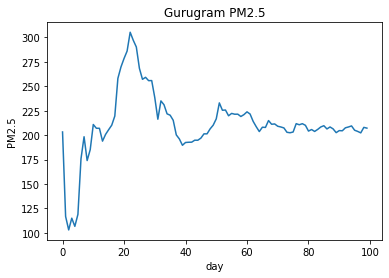

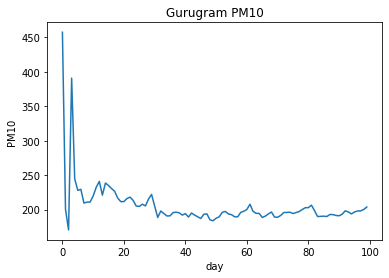

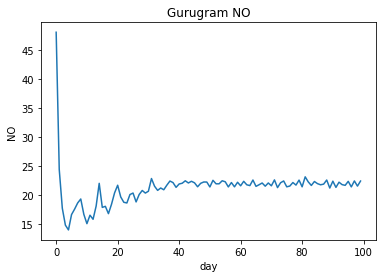

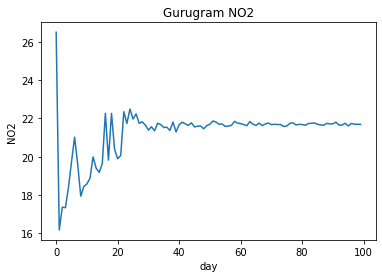

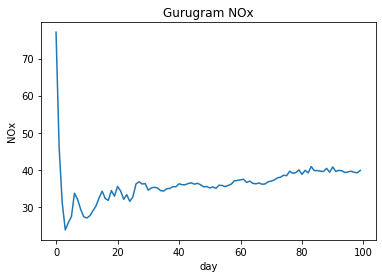

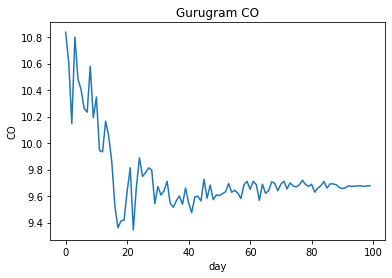

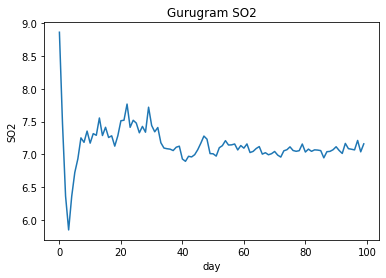

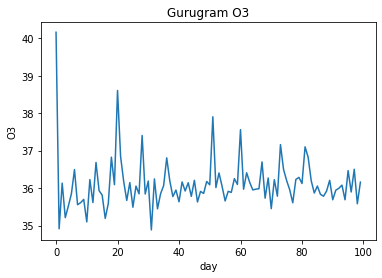

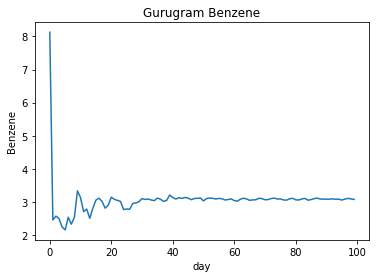

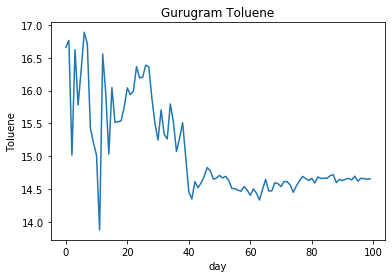

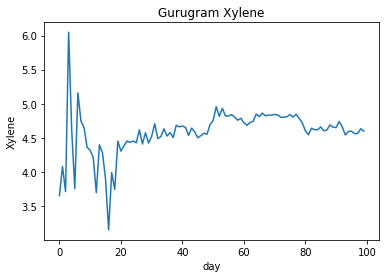

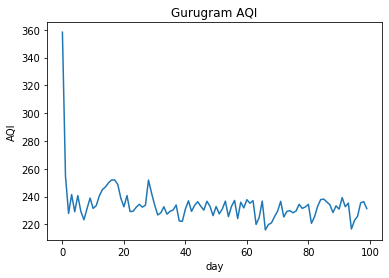

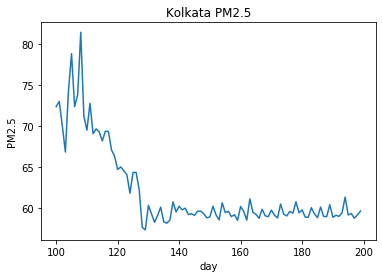

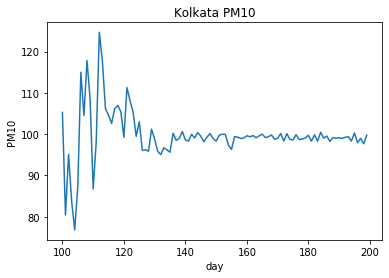

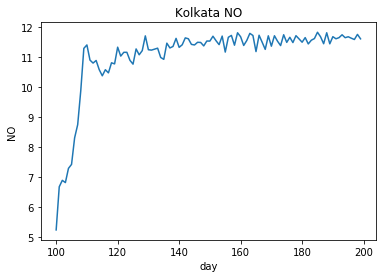

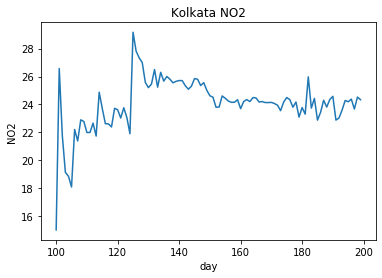

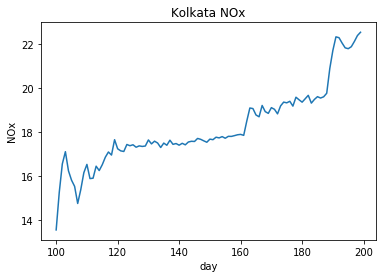

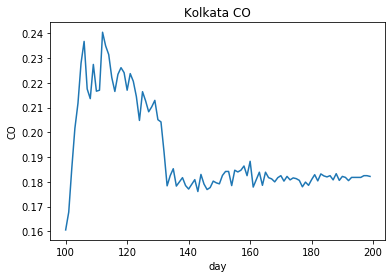

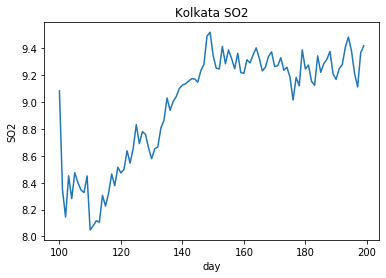

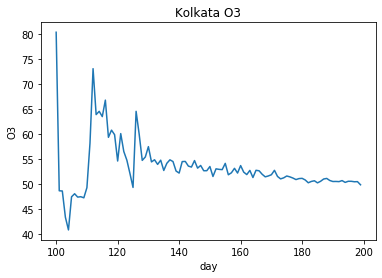

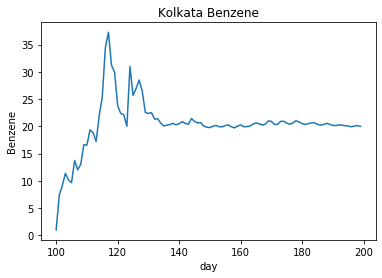

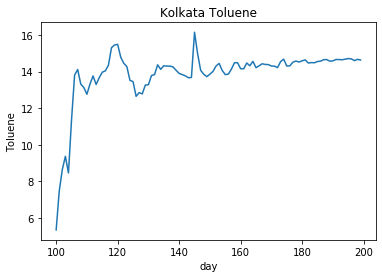

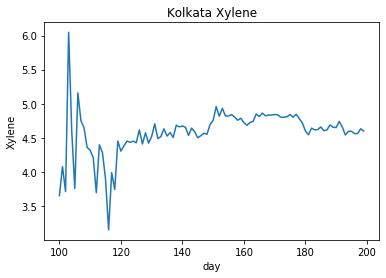

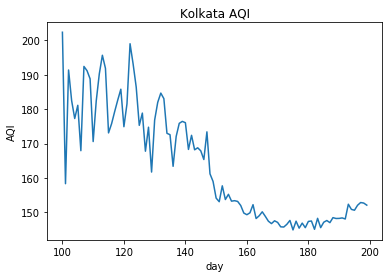

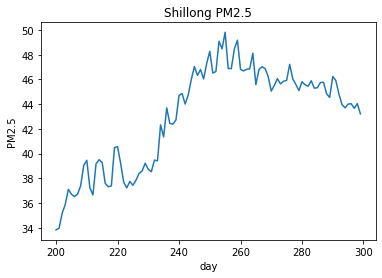

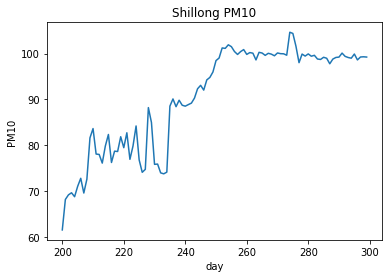

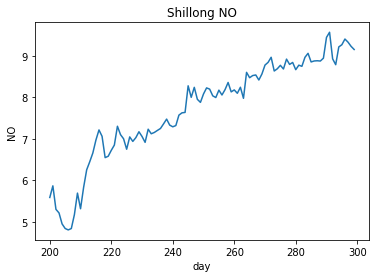

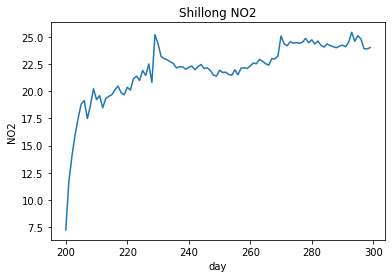

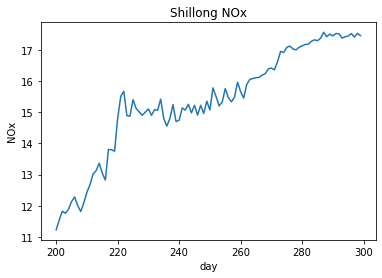

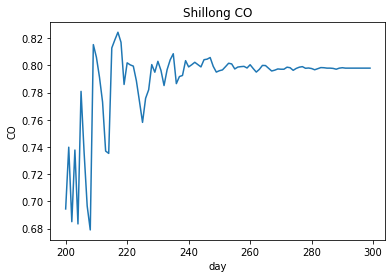

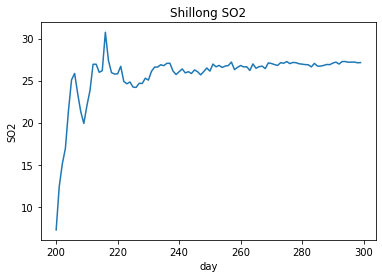

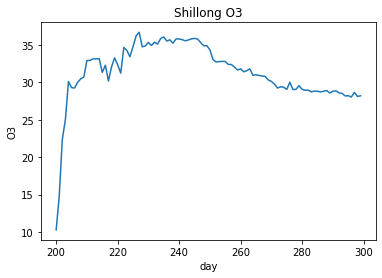

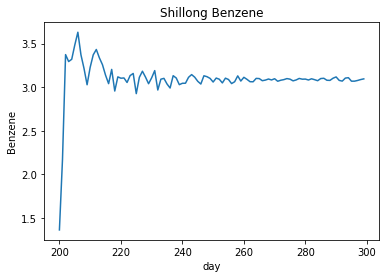

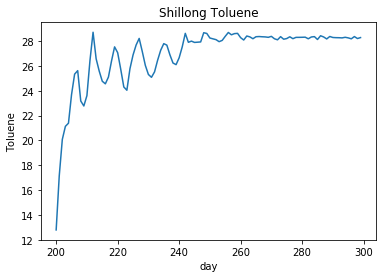

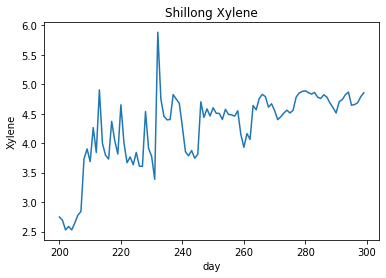

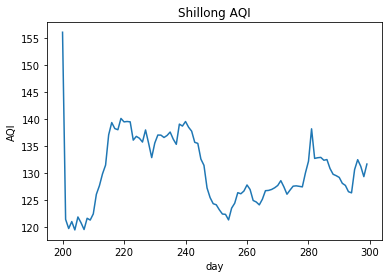

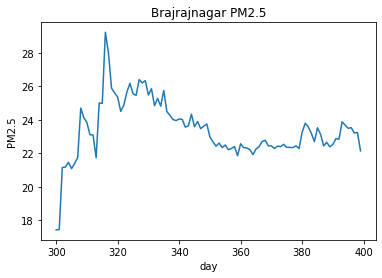

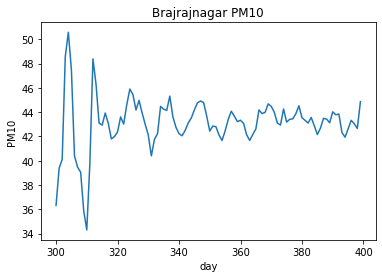

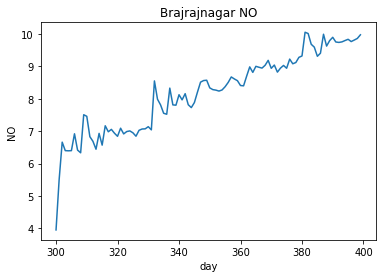

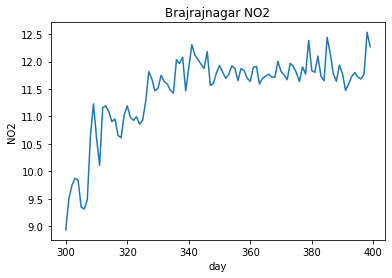

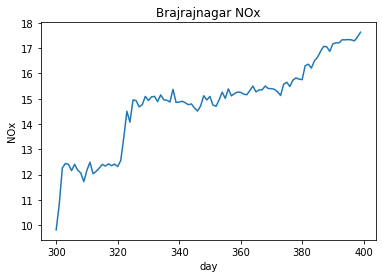

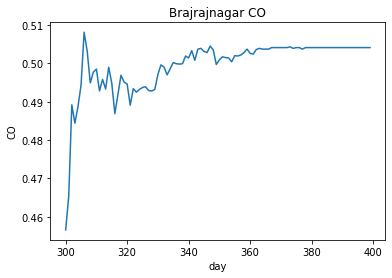

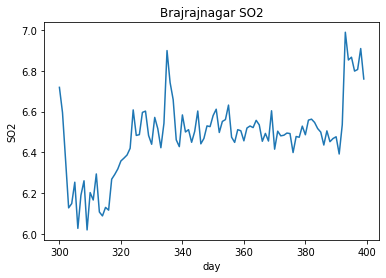

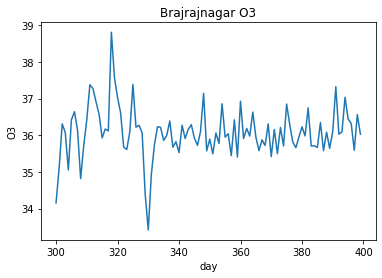

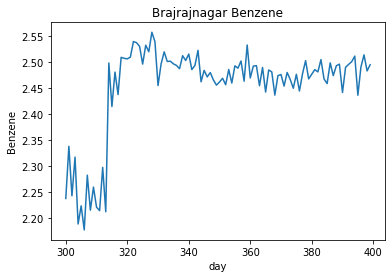

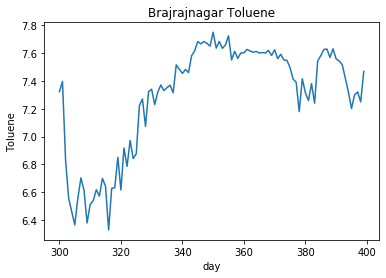

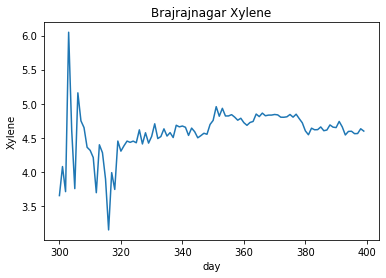

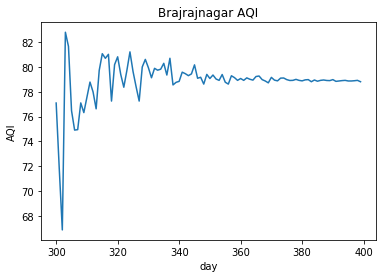

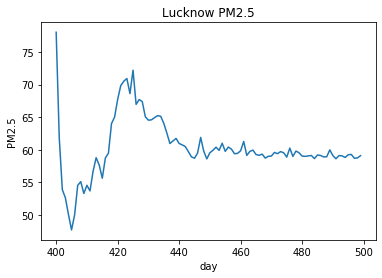

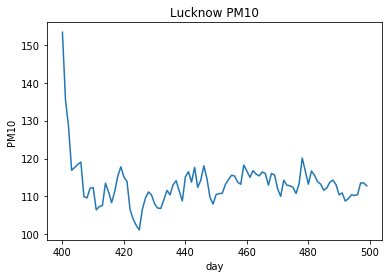

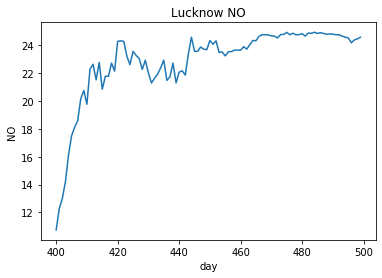

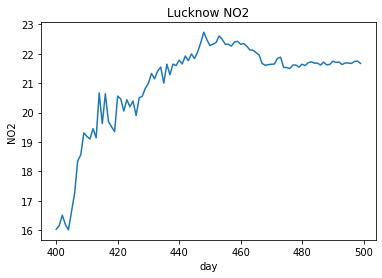

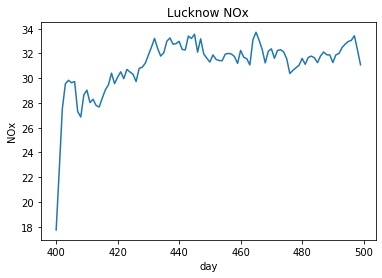

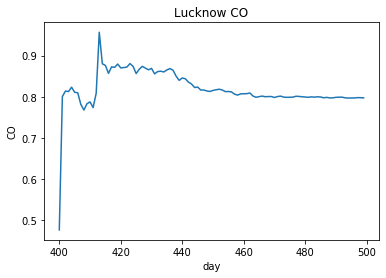

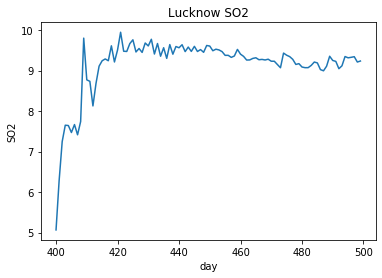

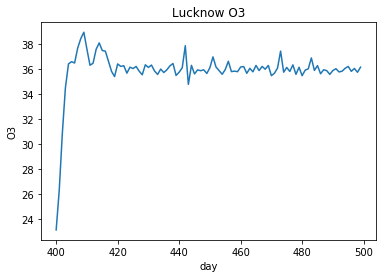

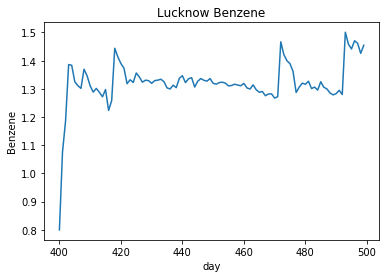

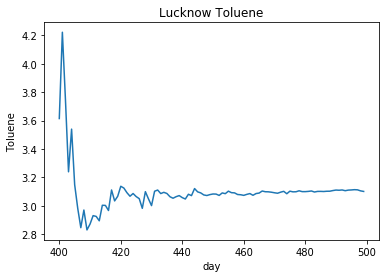

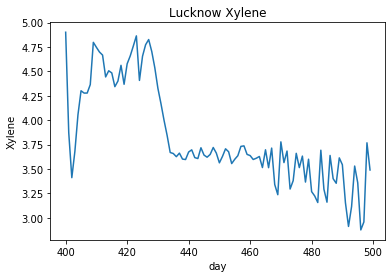

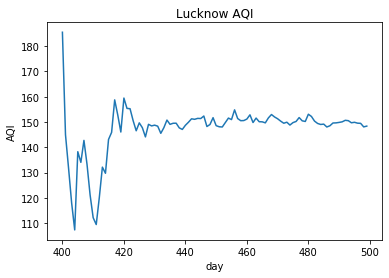

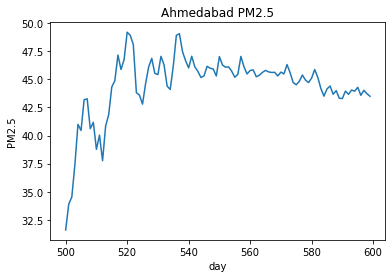

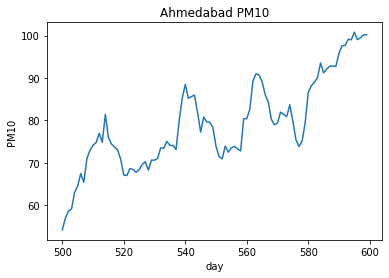

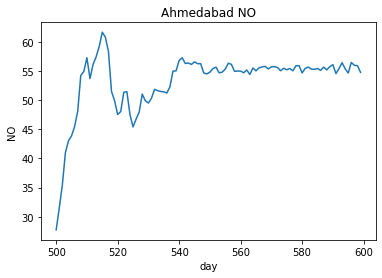

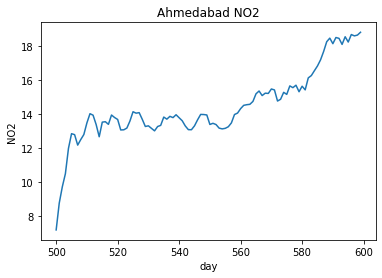

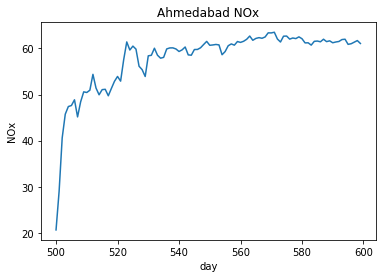

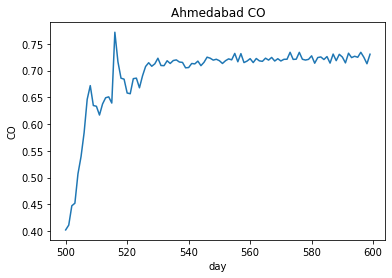

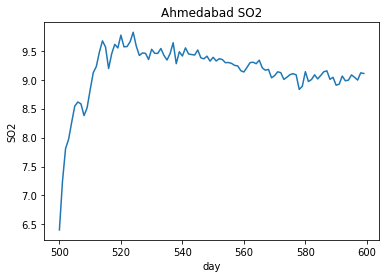

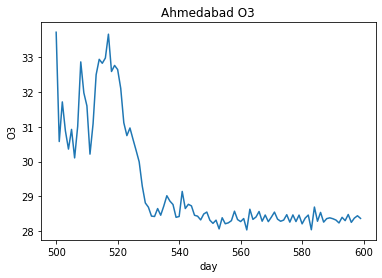

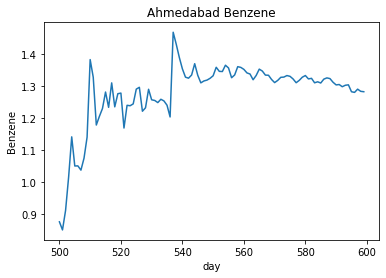

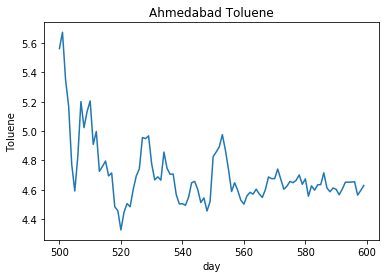

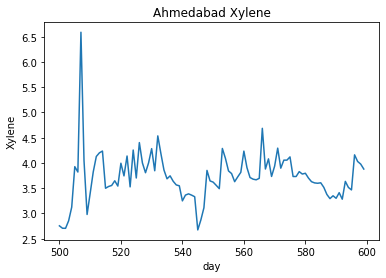

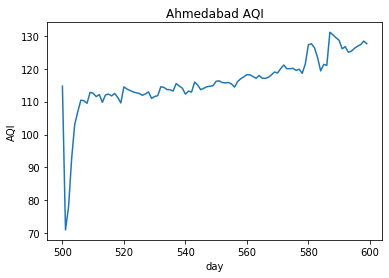

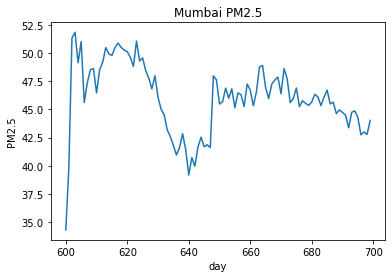

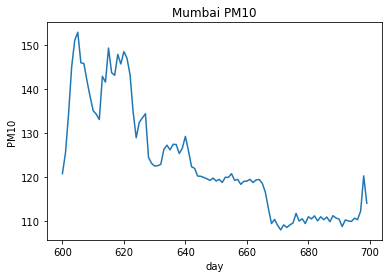

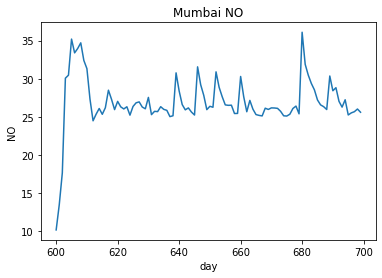

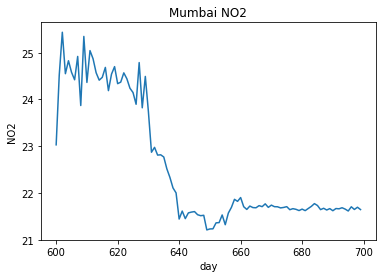

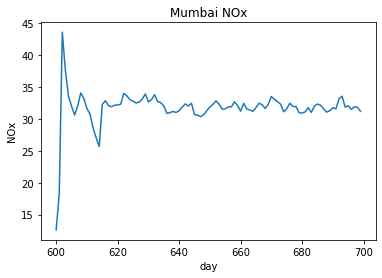

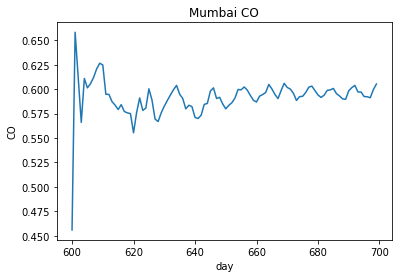

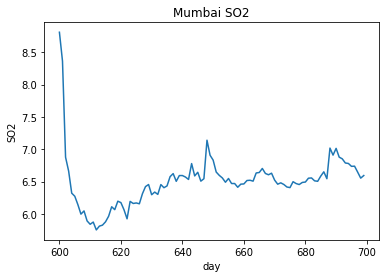

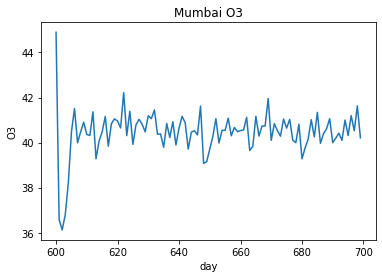

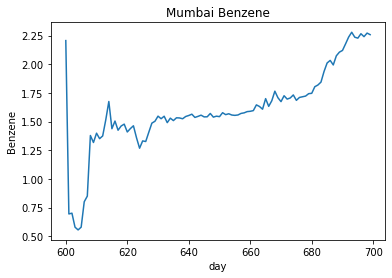

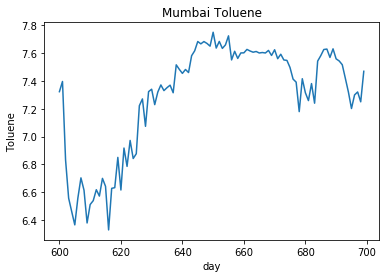

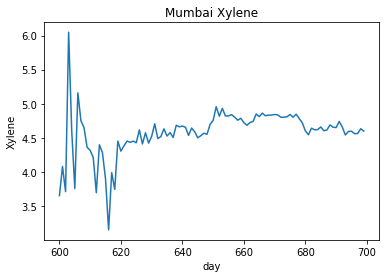

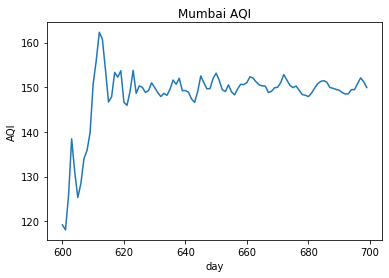

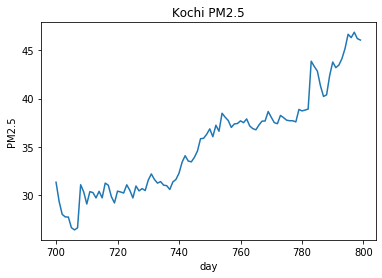

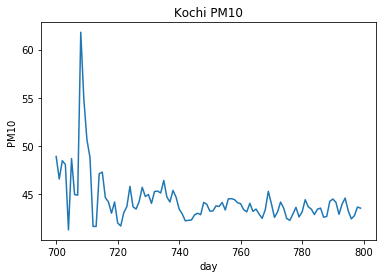

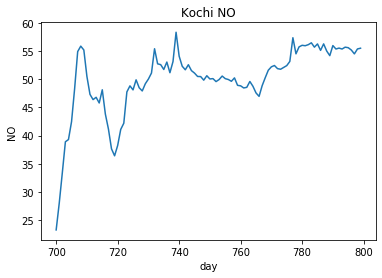

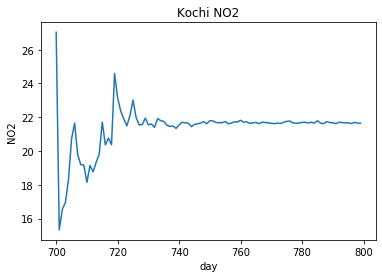

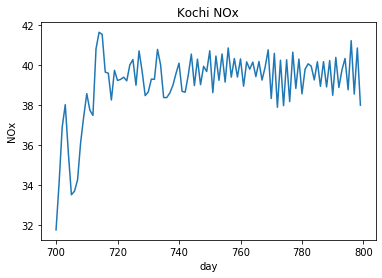

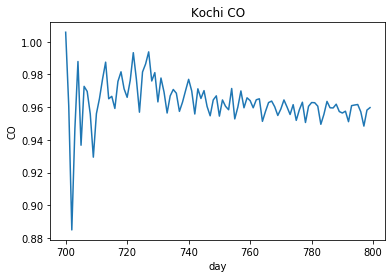

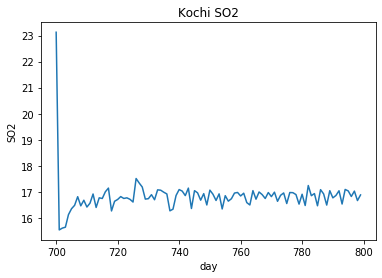

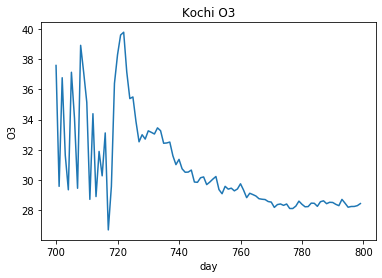

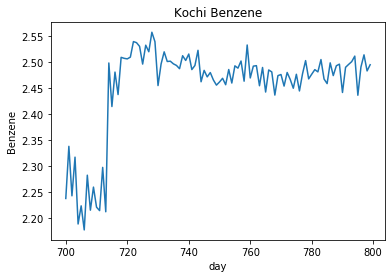

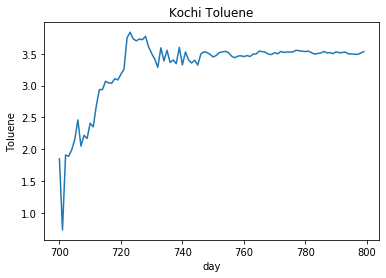

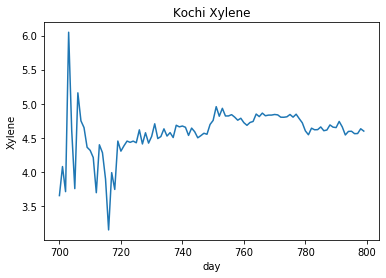

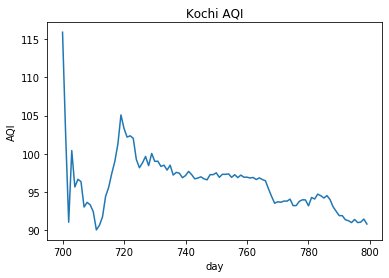

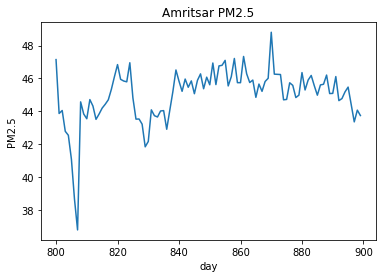

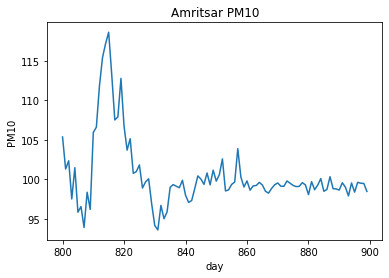

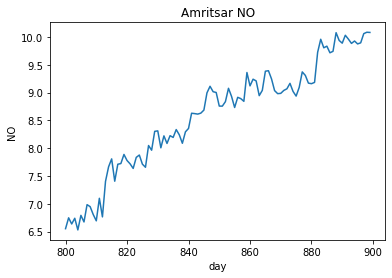

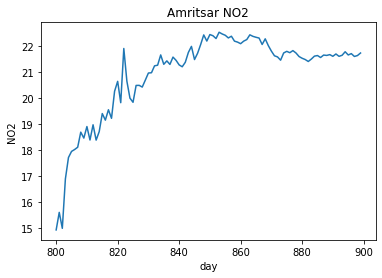

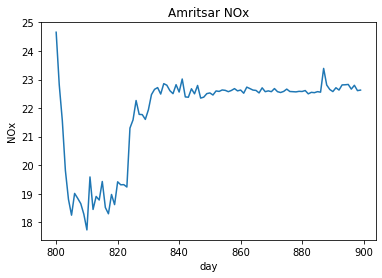

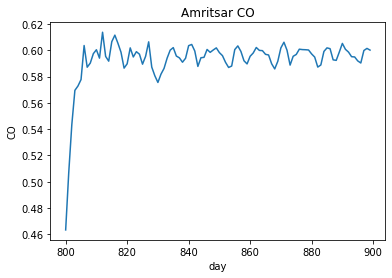

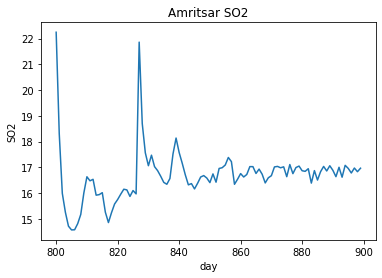

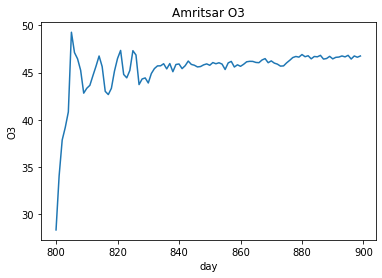

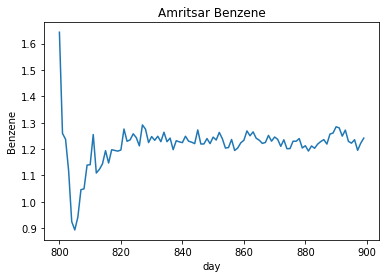

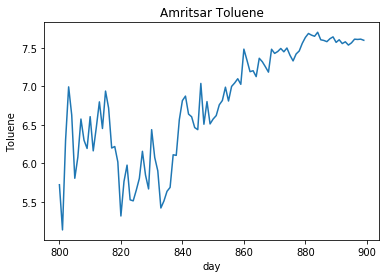

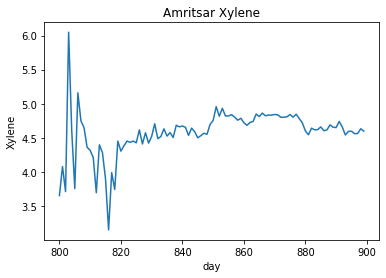

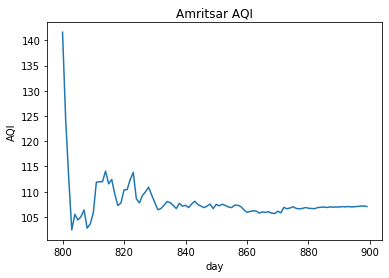

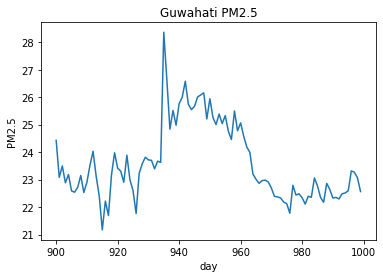

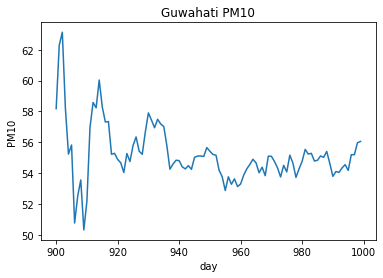

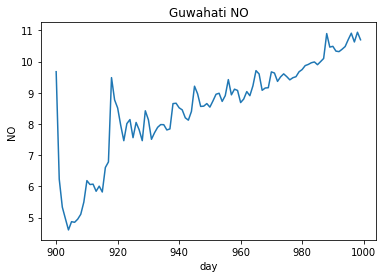

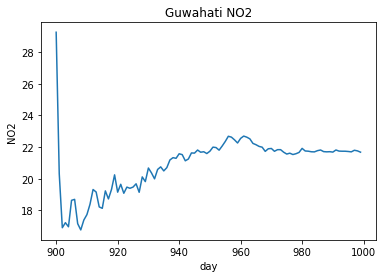

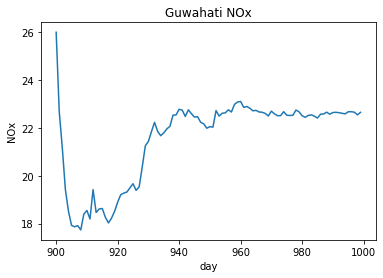

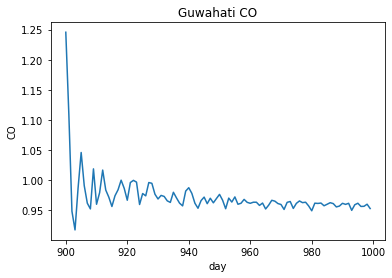

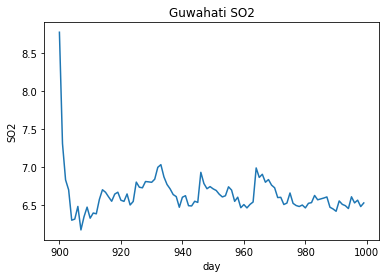

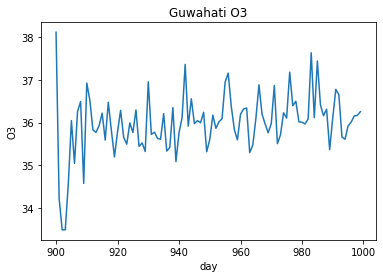

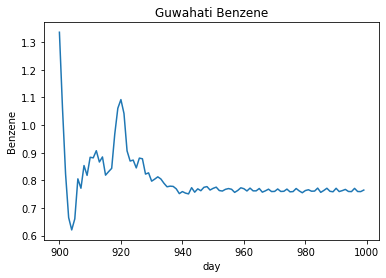

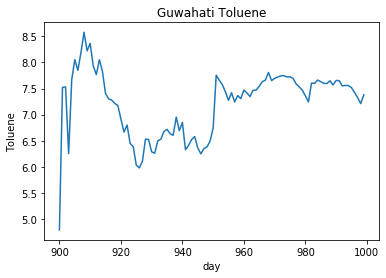

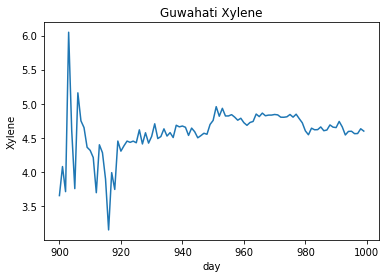

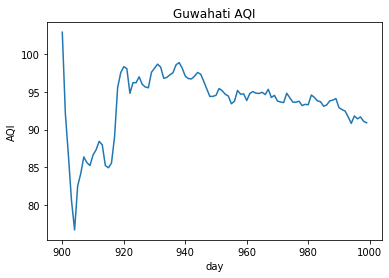

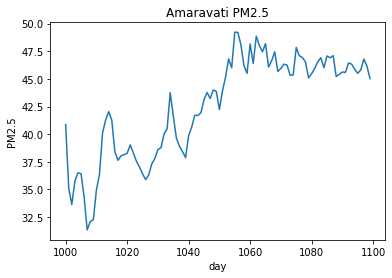

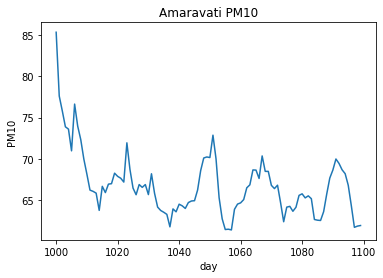

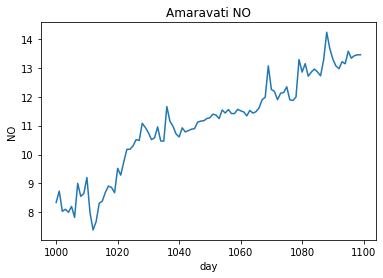

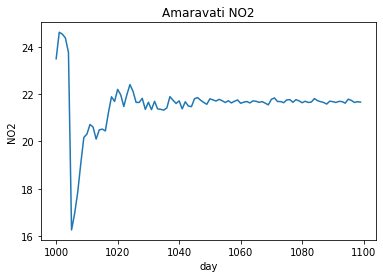

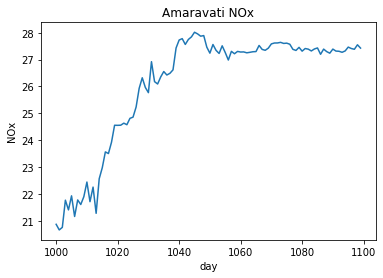

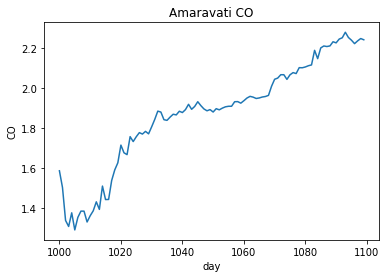

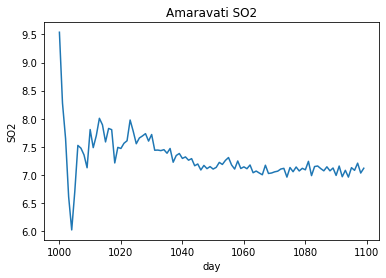

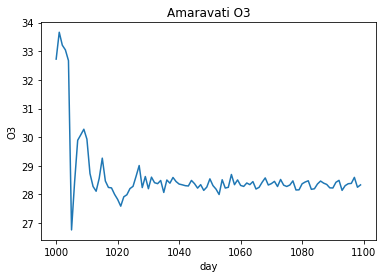

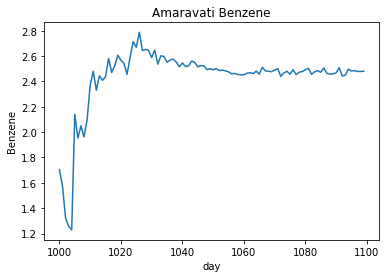

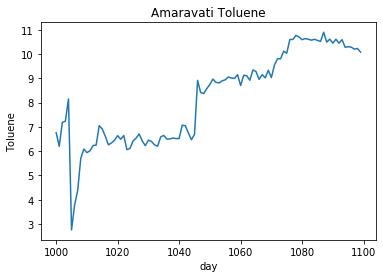

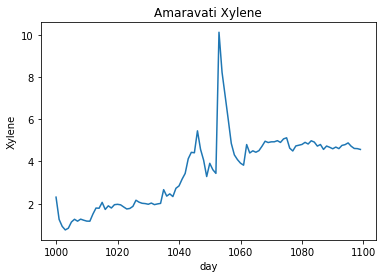

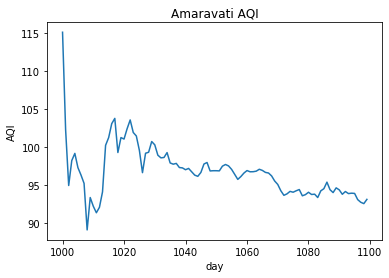

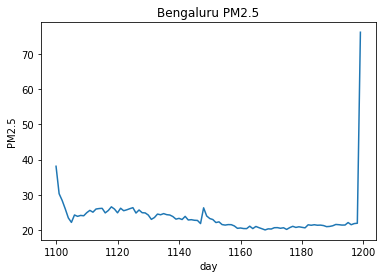

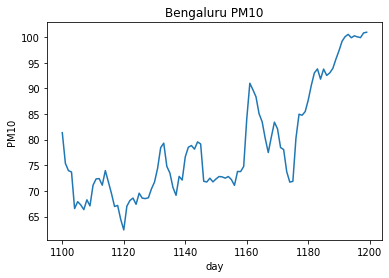

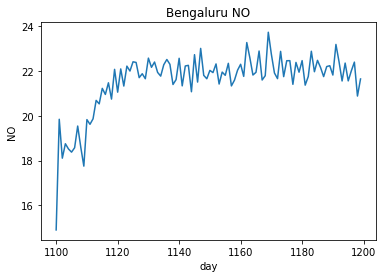

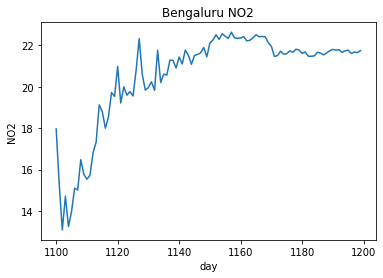

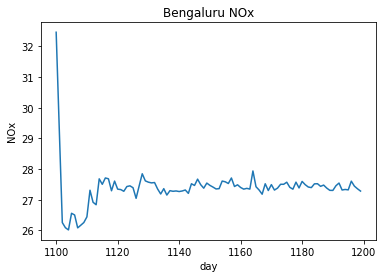

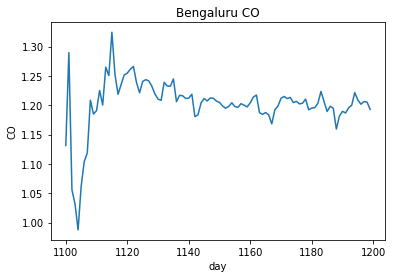

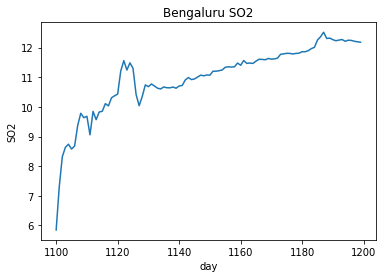

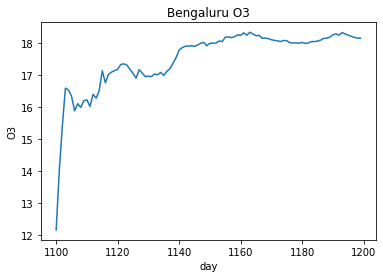

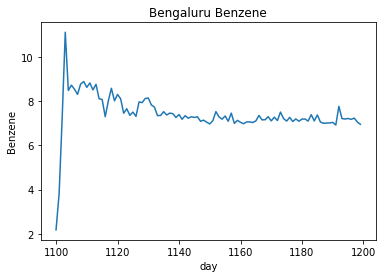

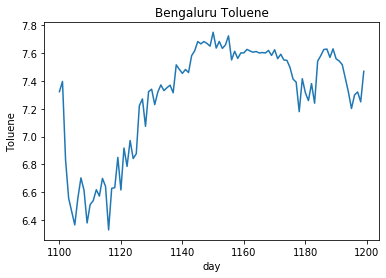

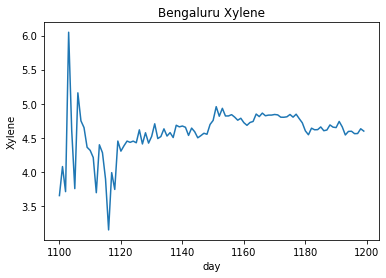

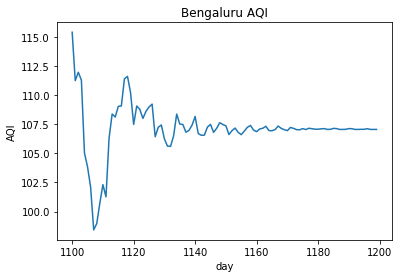

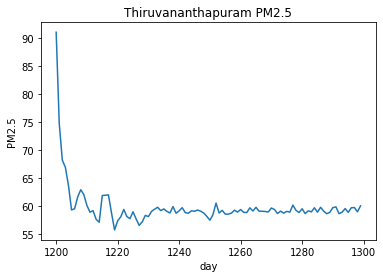

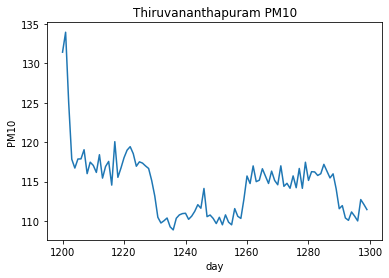

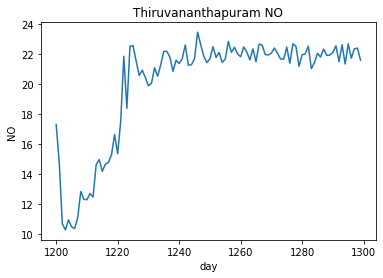

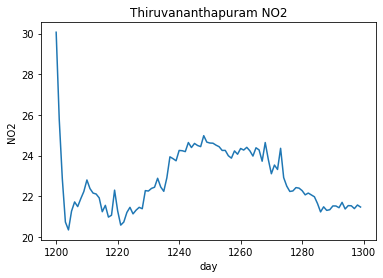

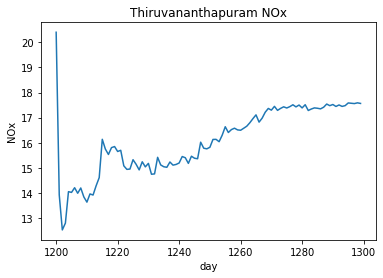

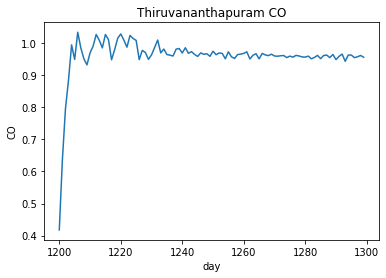

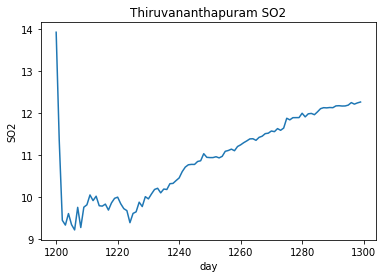

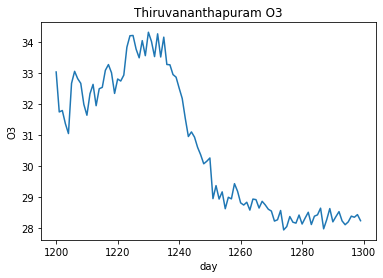

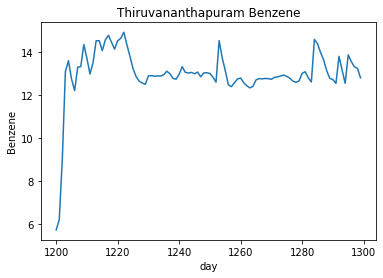

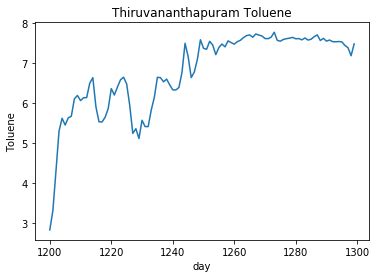

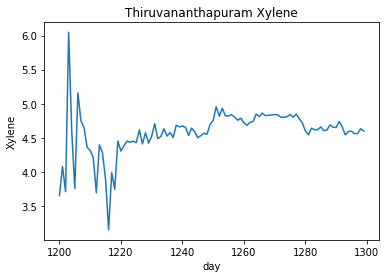

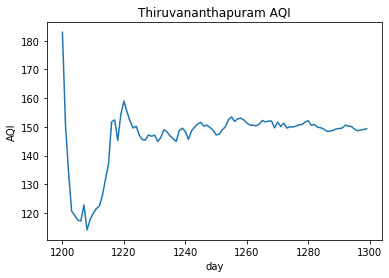

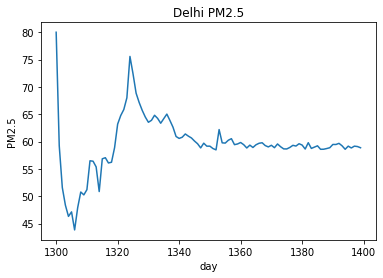

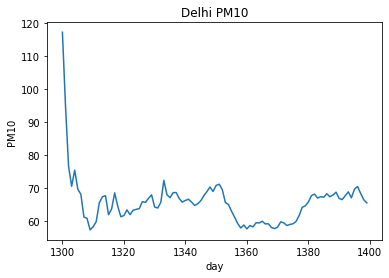

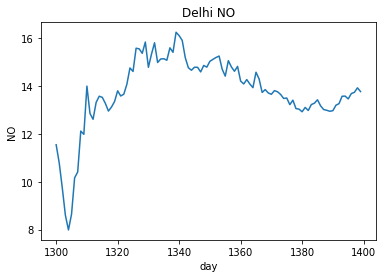

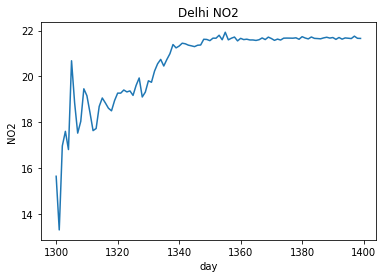

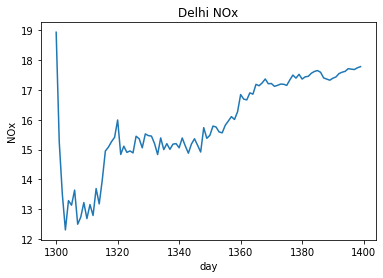

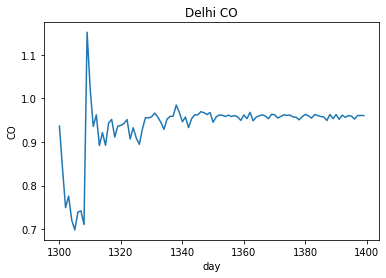

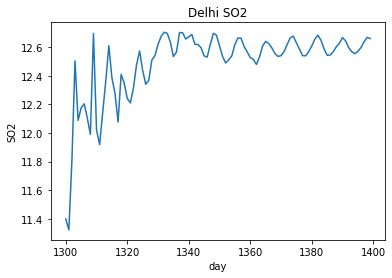

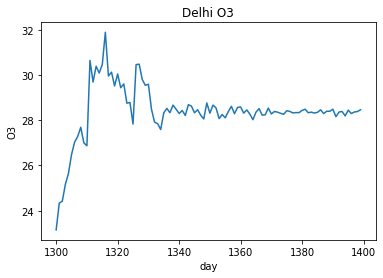

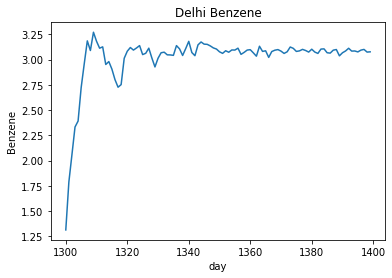

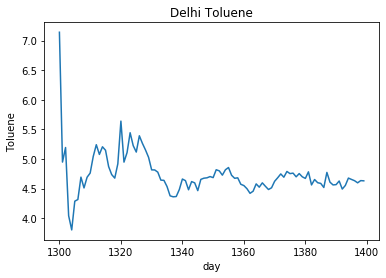

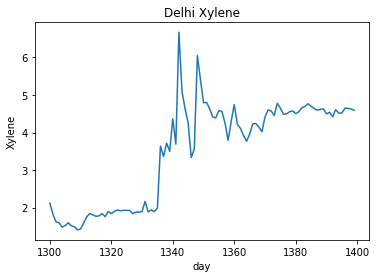

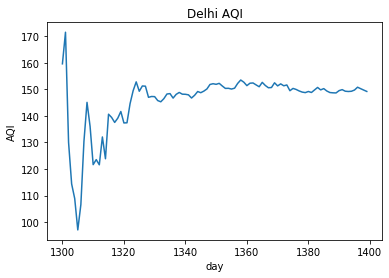

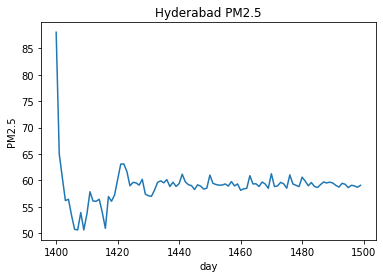

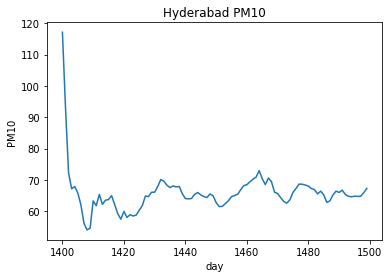

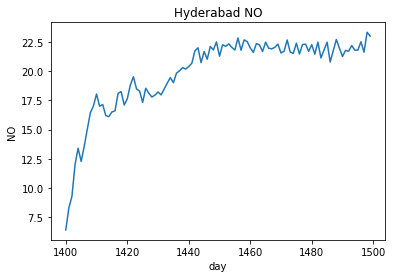

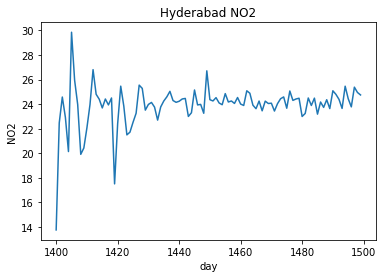

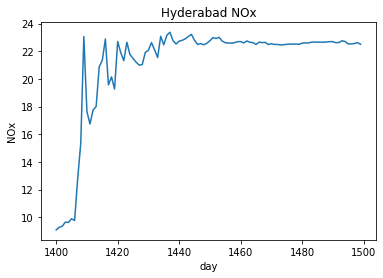

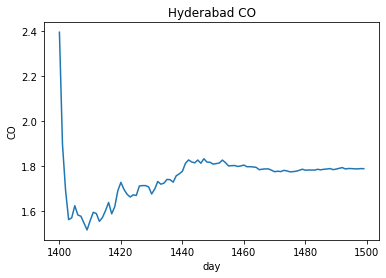

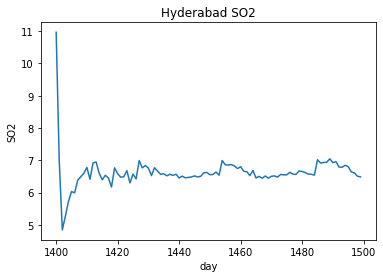

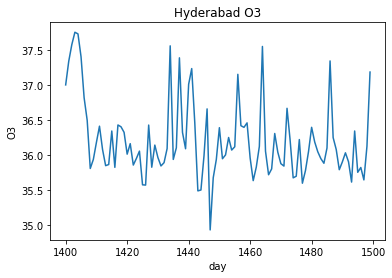

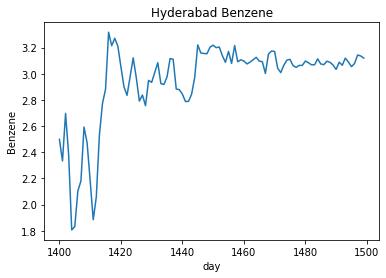

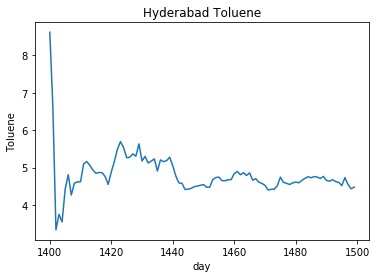

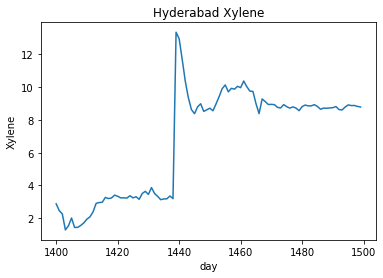

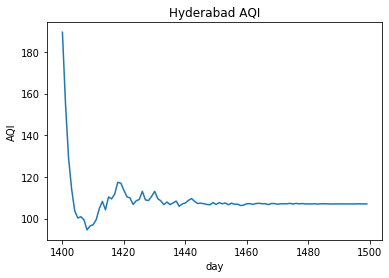

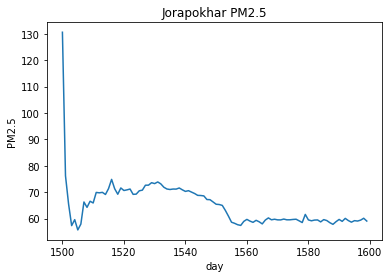

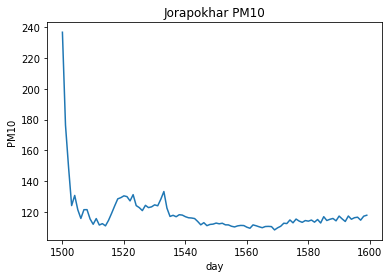

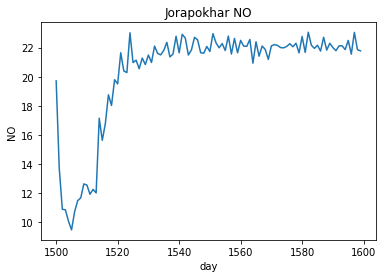

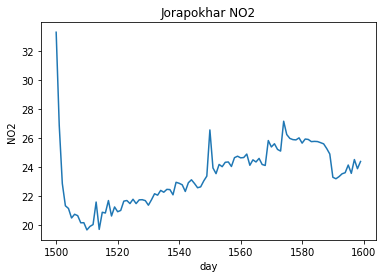

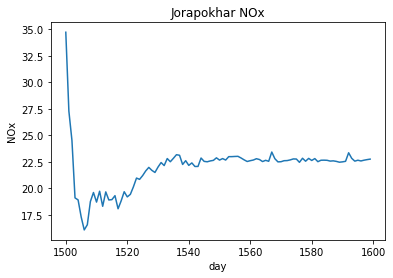

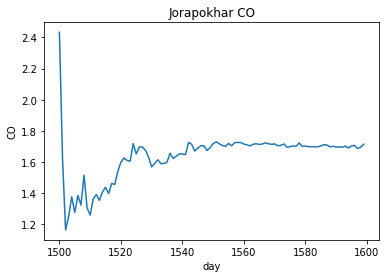

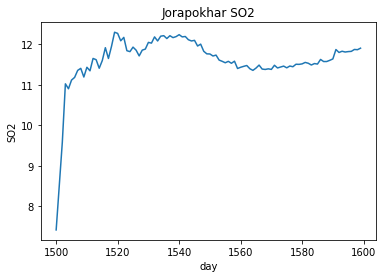

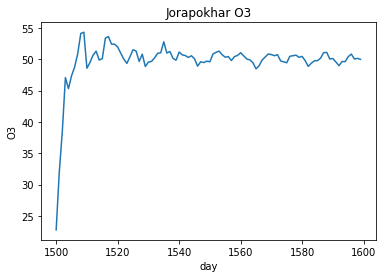

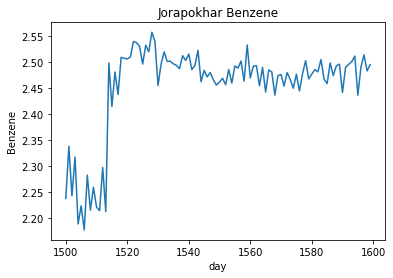

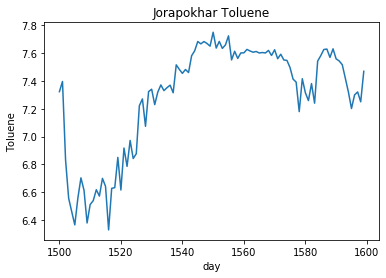

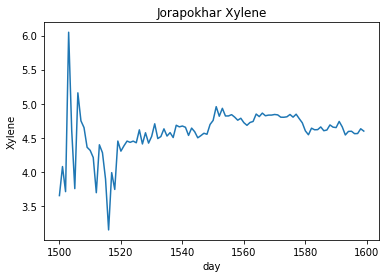

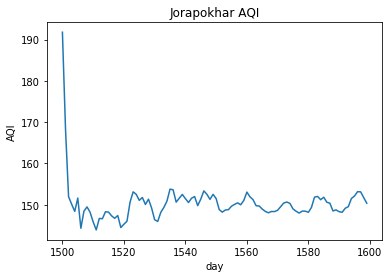

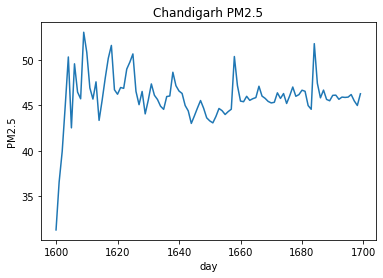

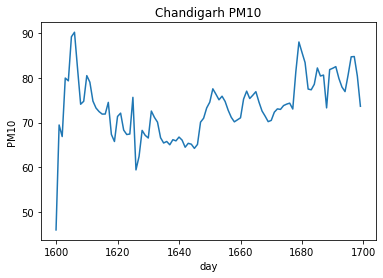

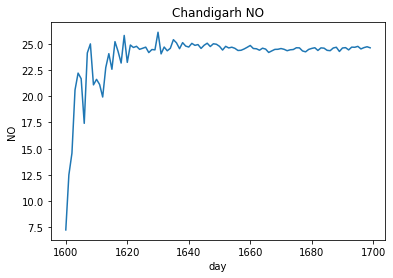

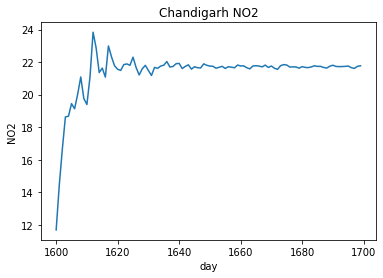

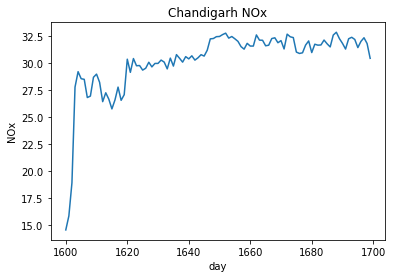

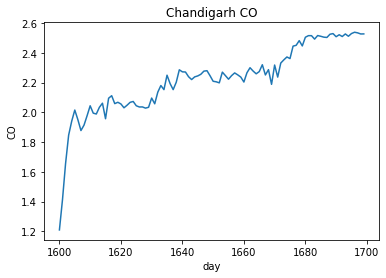

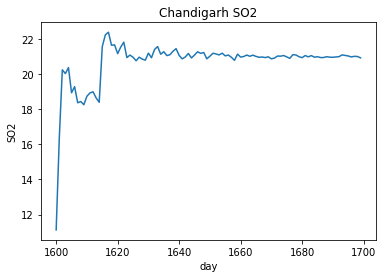

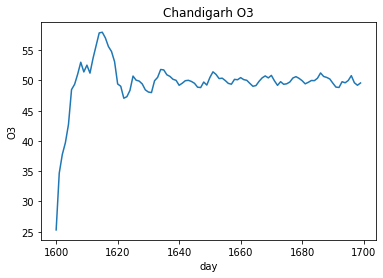

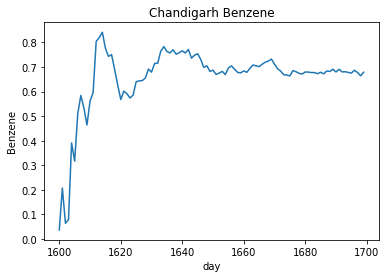

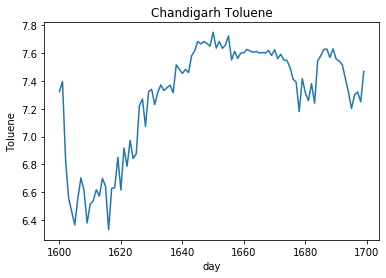

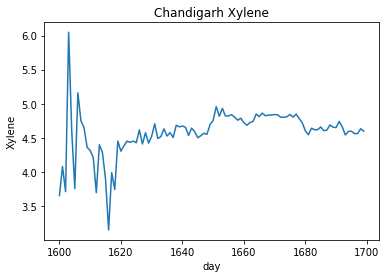

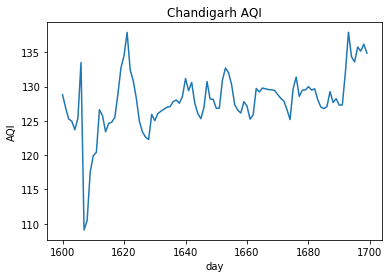

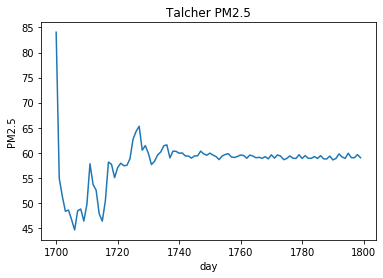

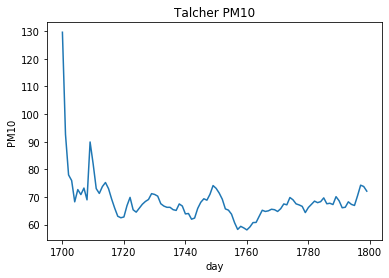

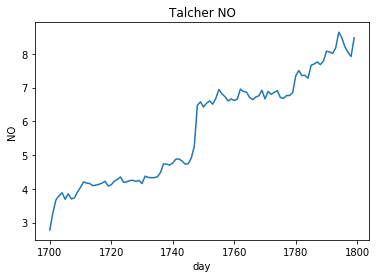

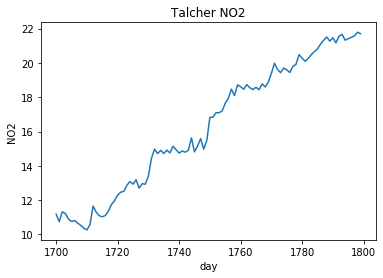

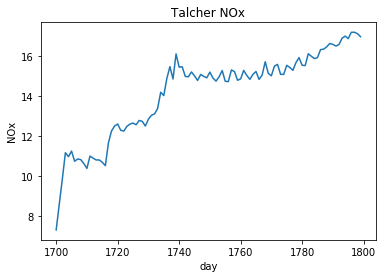

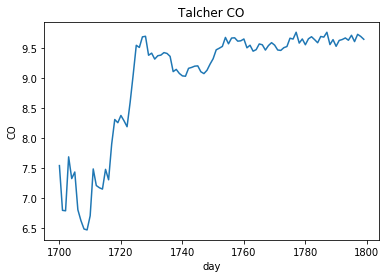

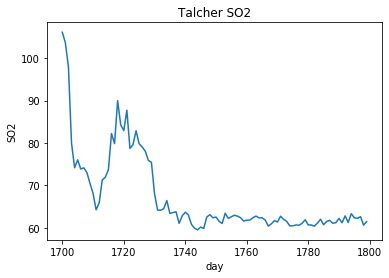

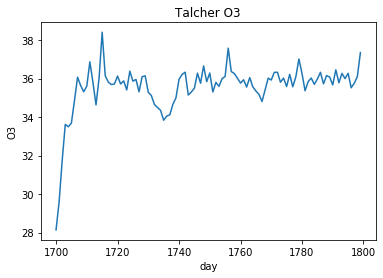

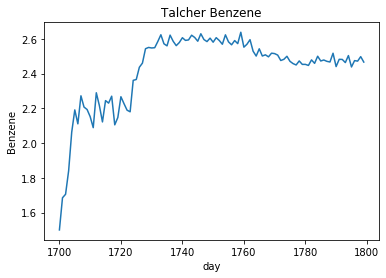

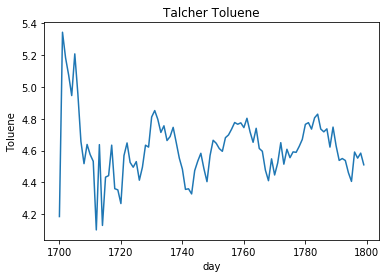

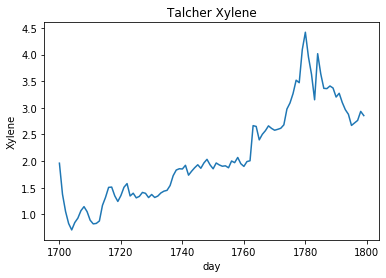

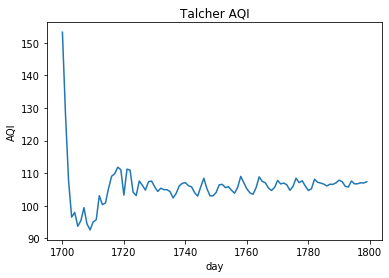

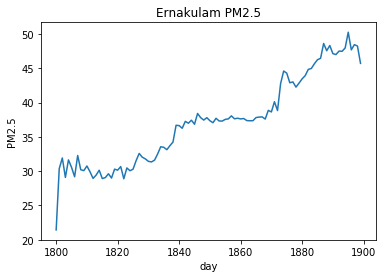

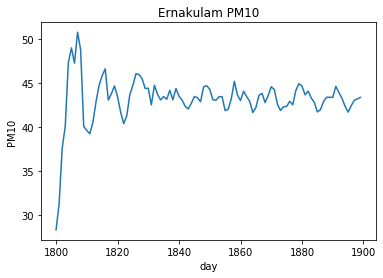

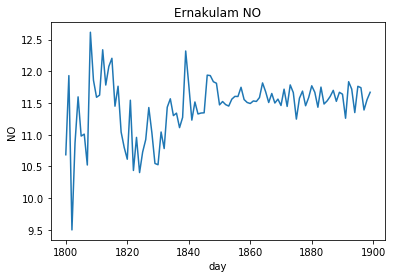

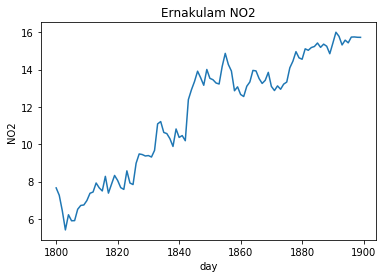

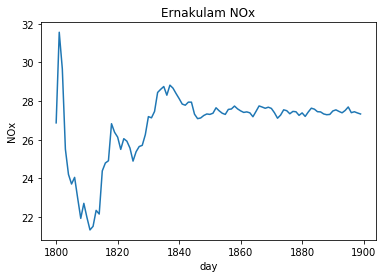

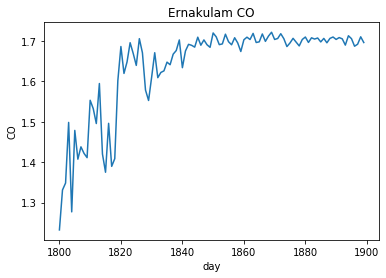

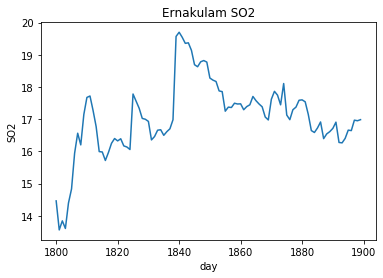

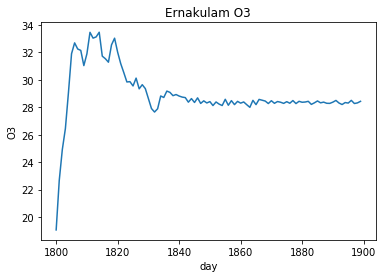

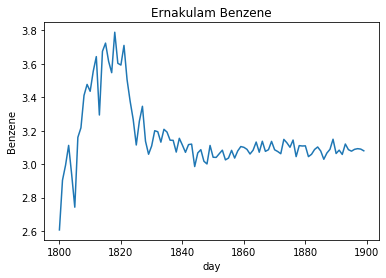

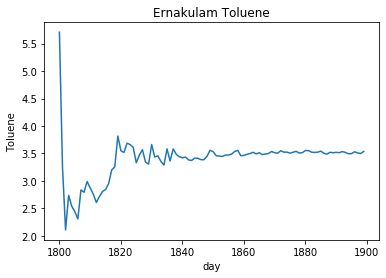

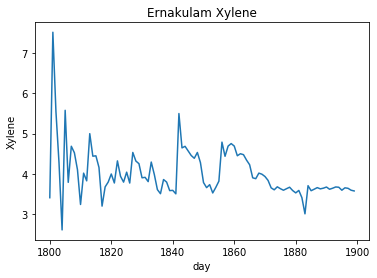

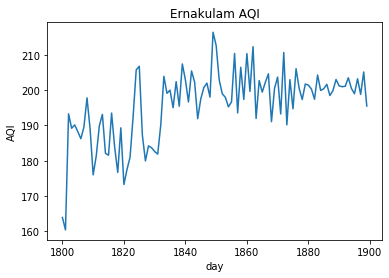

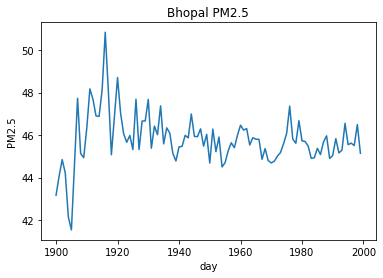

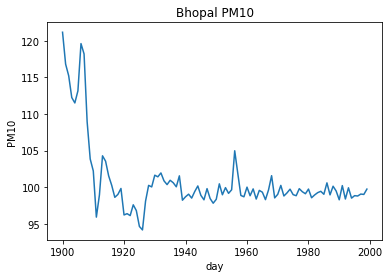

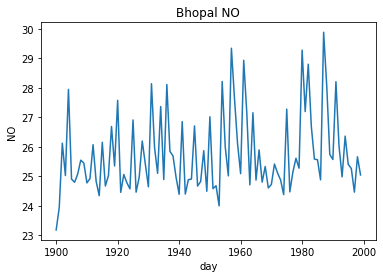

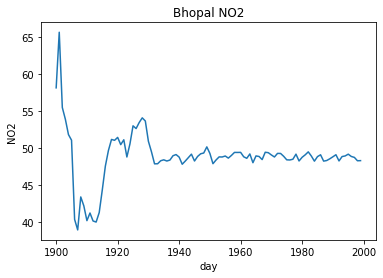

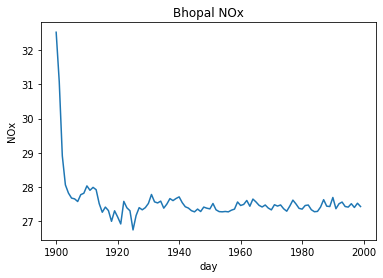

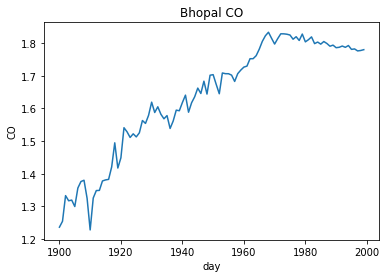

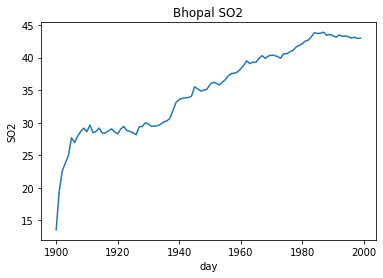

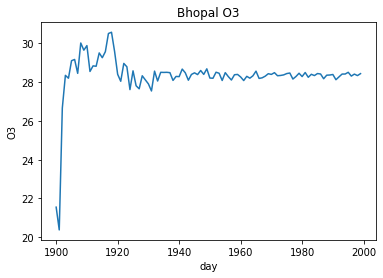

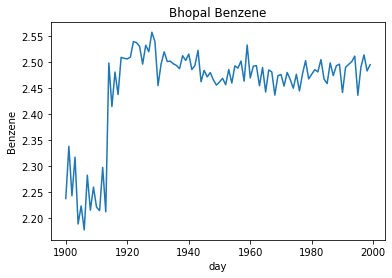

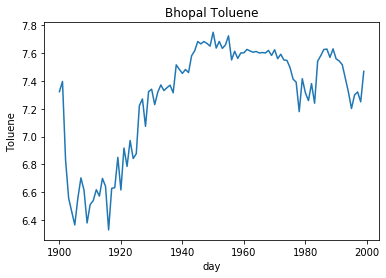

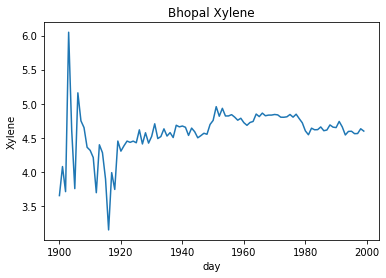

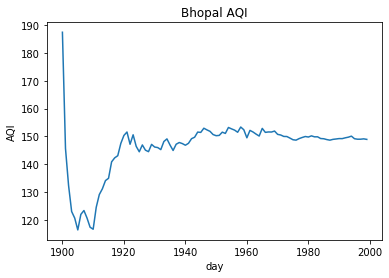

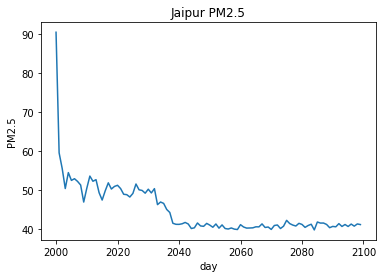

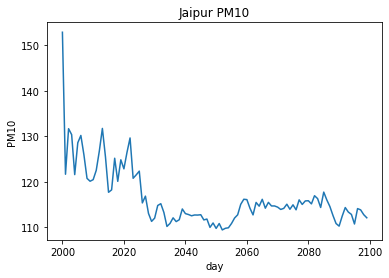

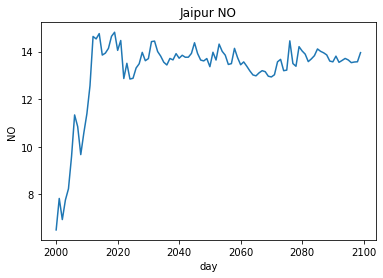

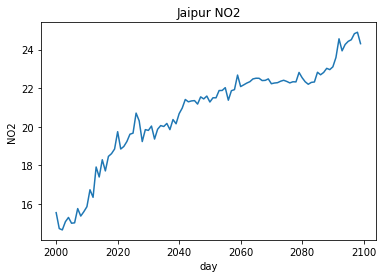

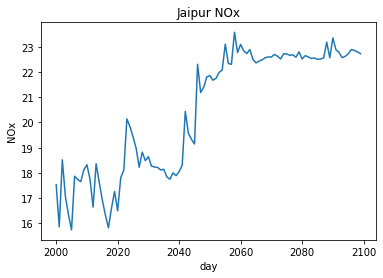

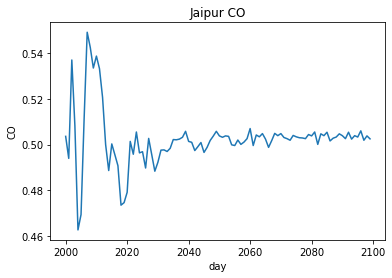

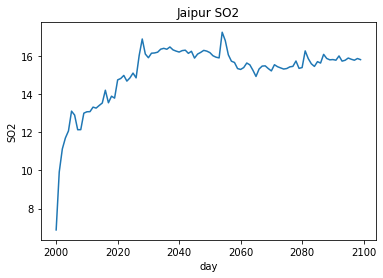

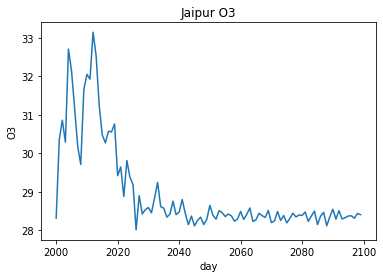

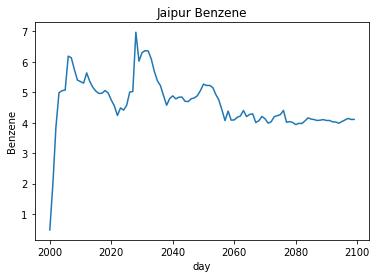

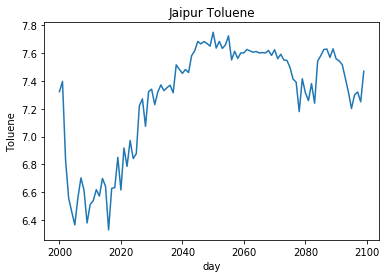

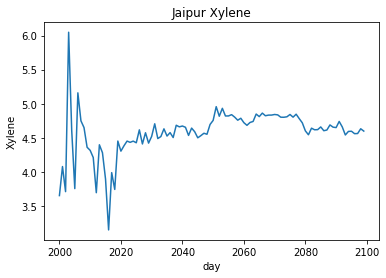

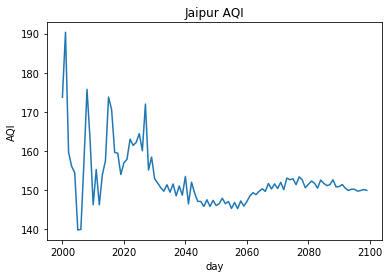

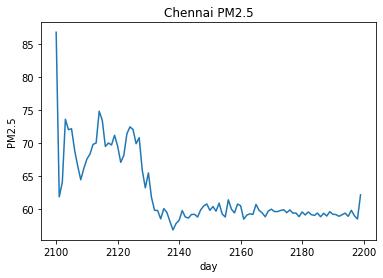

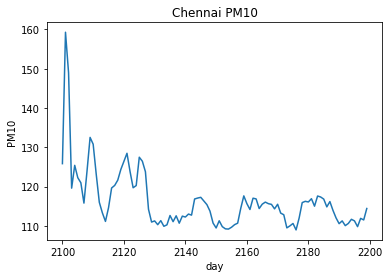

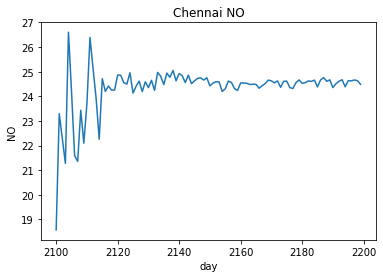

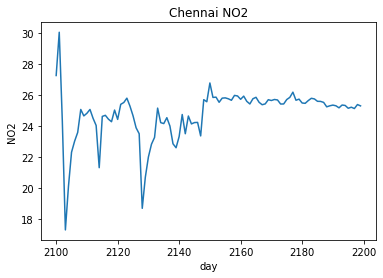

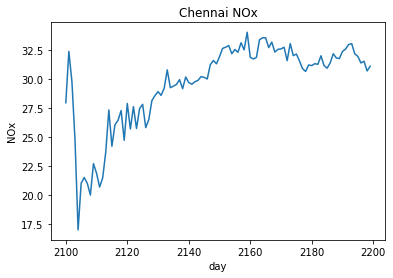

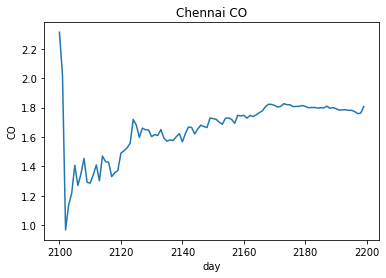

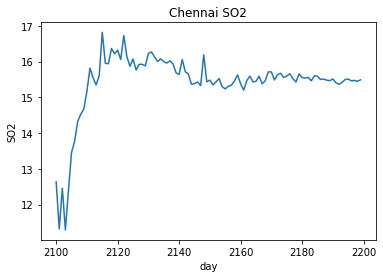

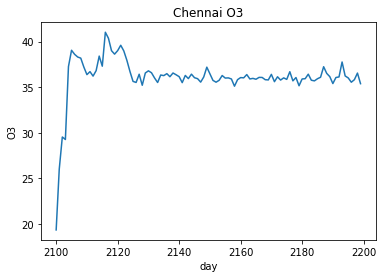

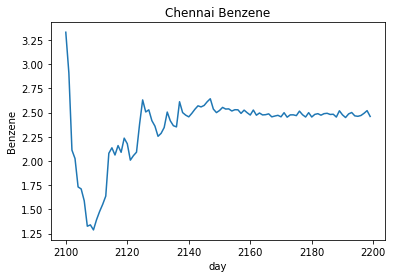

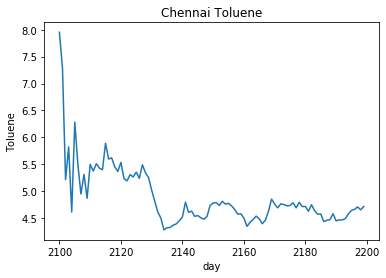

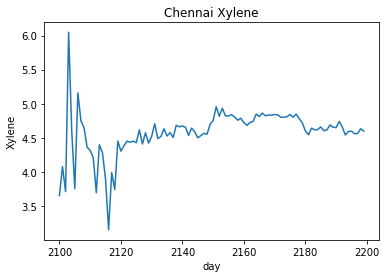

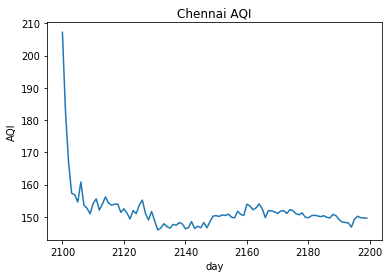

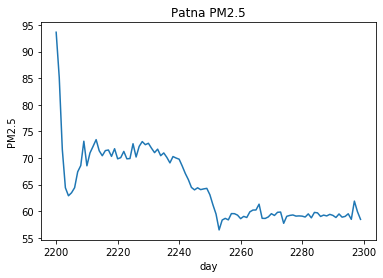

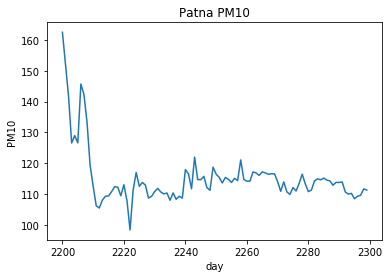

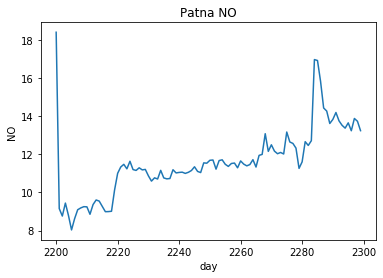

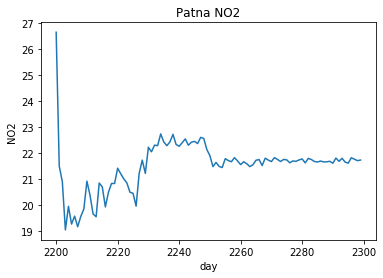

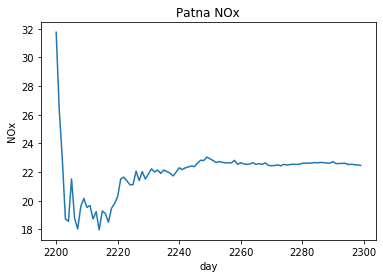

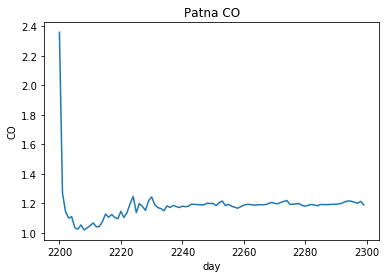

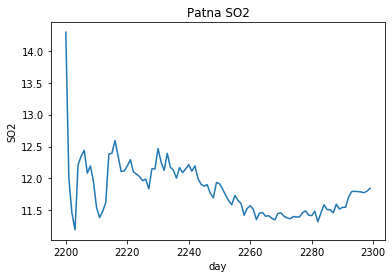

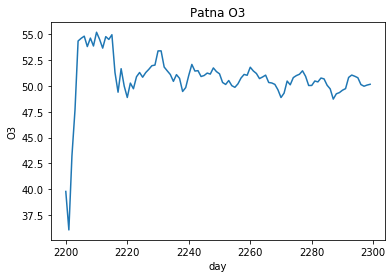

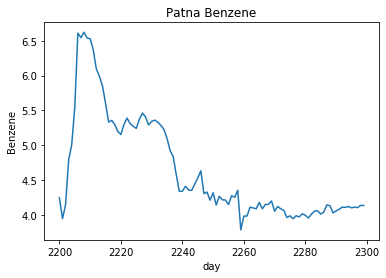

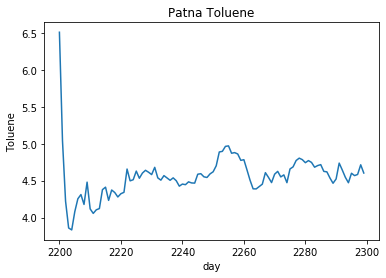

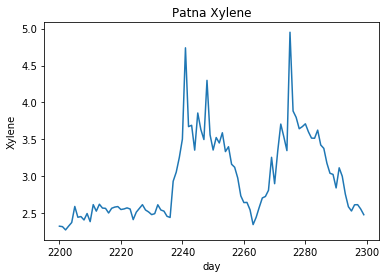

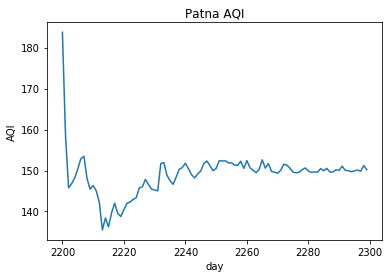

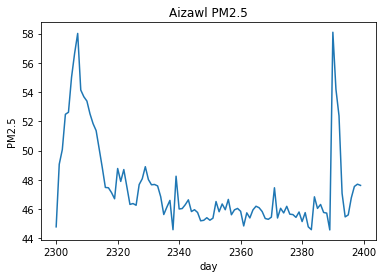

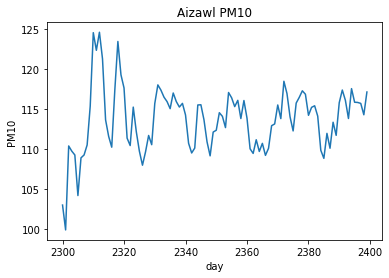

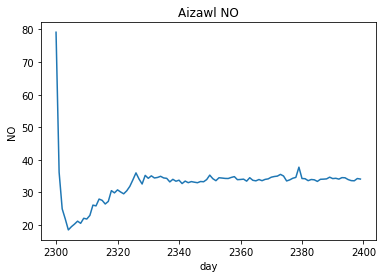

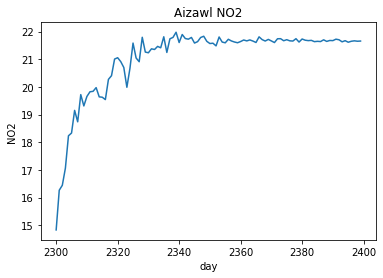

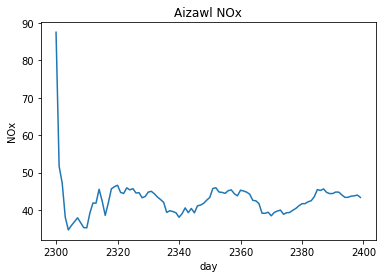

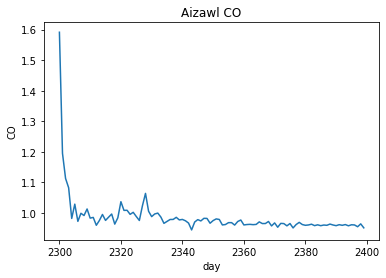

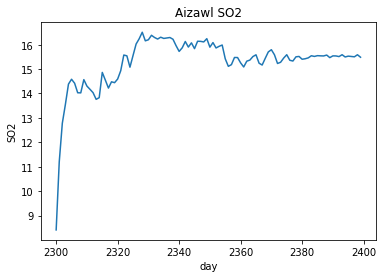

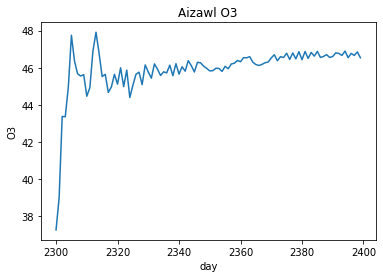

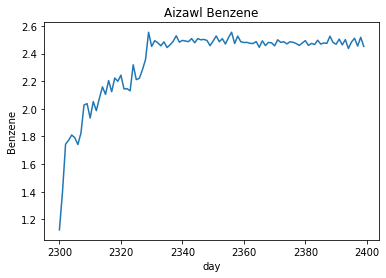

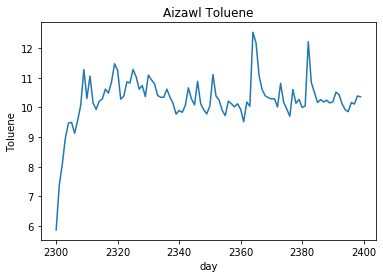

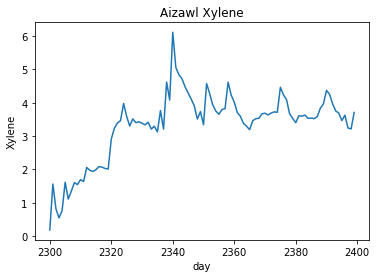

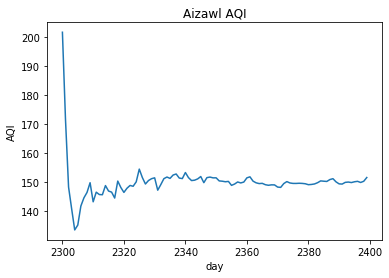

In [293]:
for j in n_city: 
    df1=final_data2[final_data2["City"]==j]
    for k in pollutants:
        df = df1[k]
        plt.plot(df)
        plt.xlabel('day')
        plt.ylabel(k)
        plt.title(str(j)+' '+str(k))
        ax = plt.gca()  # get the current axes
        ax.relim()      # make sure all the data fits
        ax.autoscale()  # auto-scale
        plt.savefig('fig1/'+str(j)+' '+str(k)+'.png')
        plt.show()
        plt.close()